## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [11]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

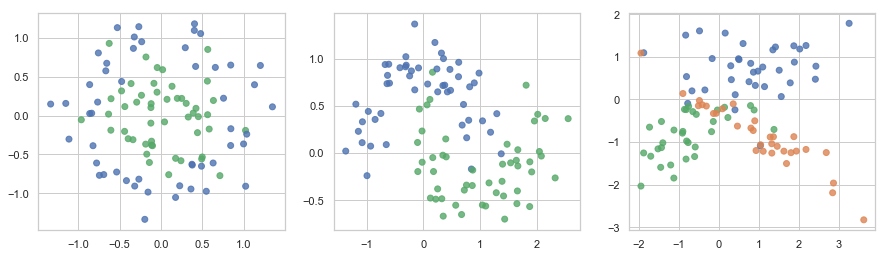

In [12]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [13]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

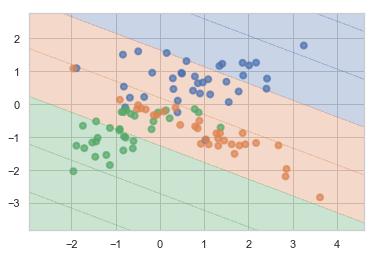

In [14]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

Dataset 1 - Train Accuracy: 1.00, Test Accuracy: 0.97


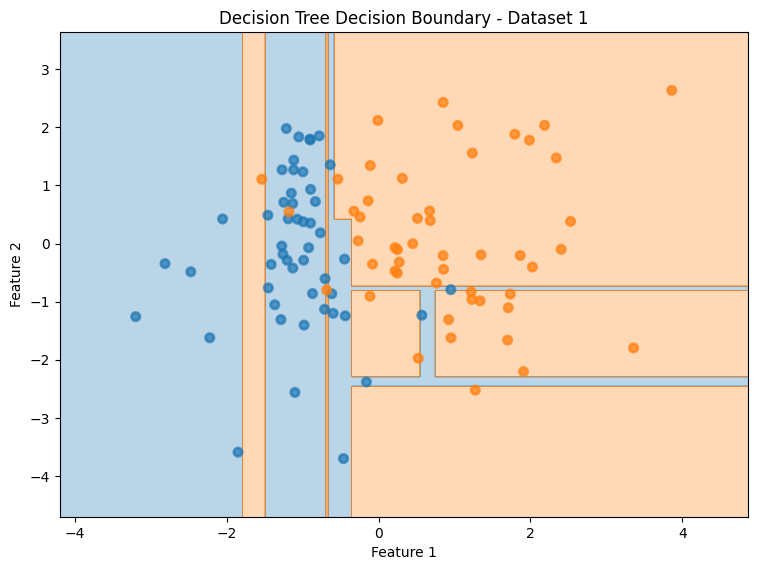

Dataset 2 - Train Accuracy: 1.00, Test Accuracy: 0.93


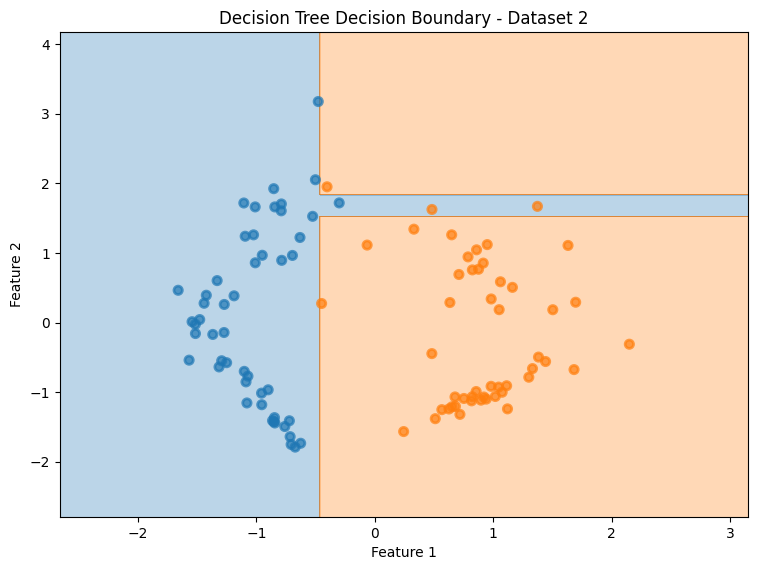

Dataset 3 - Train Accuracy: 1.00, Test Accuracy: 0.73


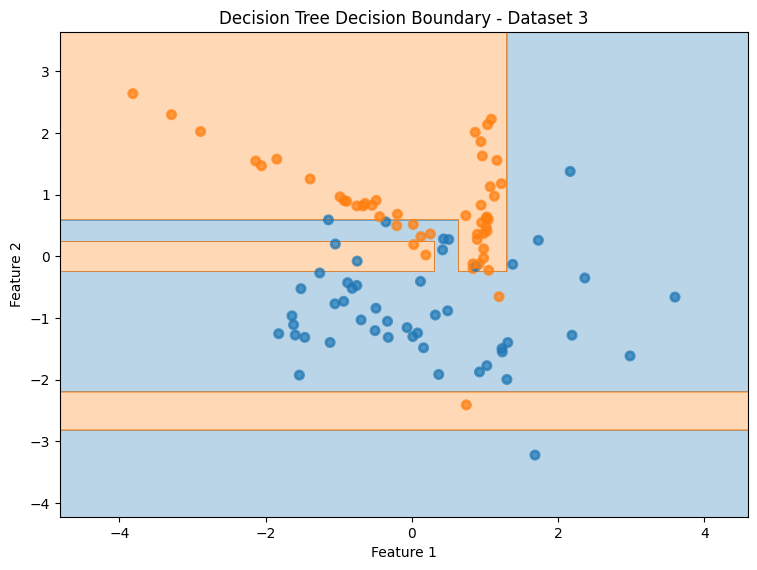

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

# Пример использования с датасетами из sklearn
datasets = [datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=i) for i in range(3)]

for i, (X, y) in enumerate(datasets):
    # Разбиваем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучаем решающее дерево
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Предсказания
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # Вычисляем accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Dataset {i+1} - Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

    # Построение графика
    plt.figure(figsize=(8, 6))
    plt.title(f'Decision Tree Decision Boundary - Dataset {i+1}')
    plot_surface(clf, X, y)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

на переобучение указывают изогнутые границы графиков, т.к. границы графиков достаточно прямые, переобучения, вероятно, нет

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

__Ответ:__

Dataset 1 | max_depth: None, min_samples_leaf: 1 | Train Accuracy: 1.00, Test Accuracy: 0.97


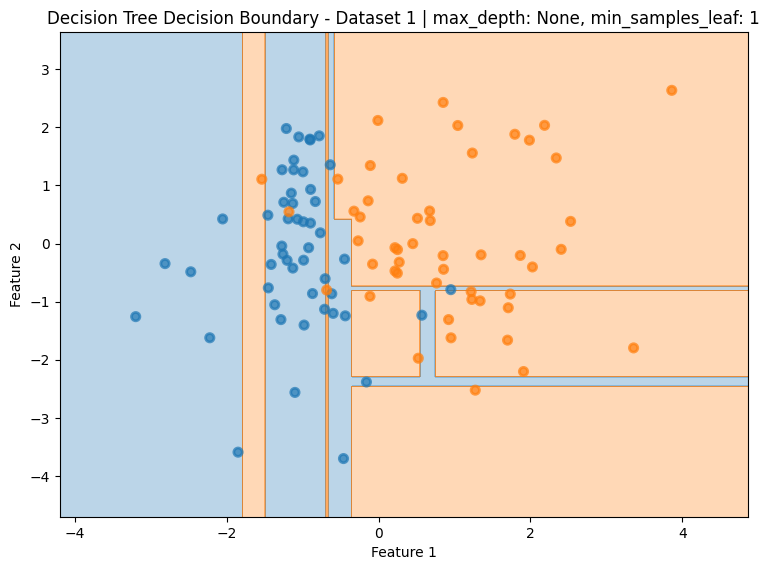

Dataset 1 | max_depth: None, min_samples_leaf: 2 | Train Accuracy: 0.93, Test Accuracy: 0.97


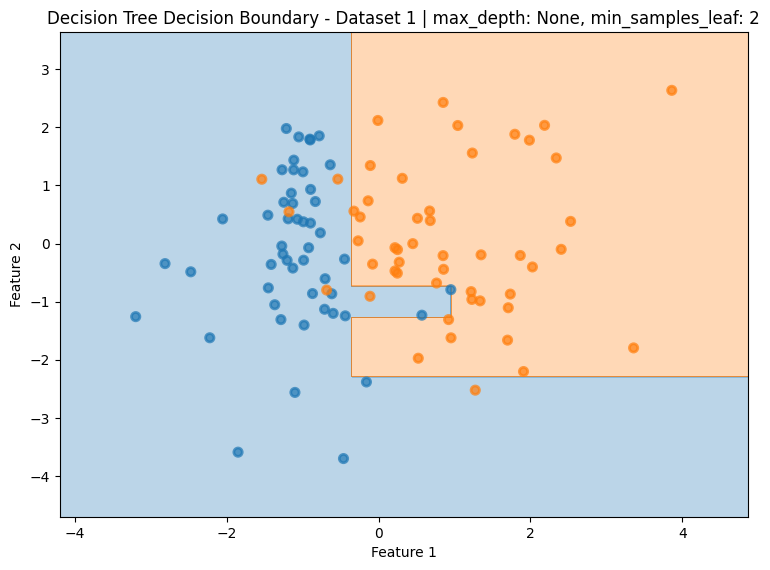

Dataset 1 | max_depth: None, min_samples_leaf: 5 | Train Accuracy: 0.91, Test Accuracy: 0.97


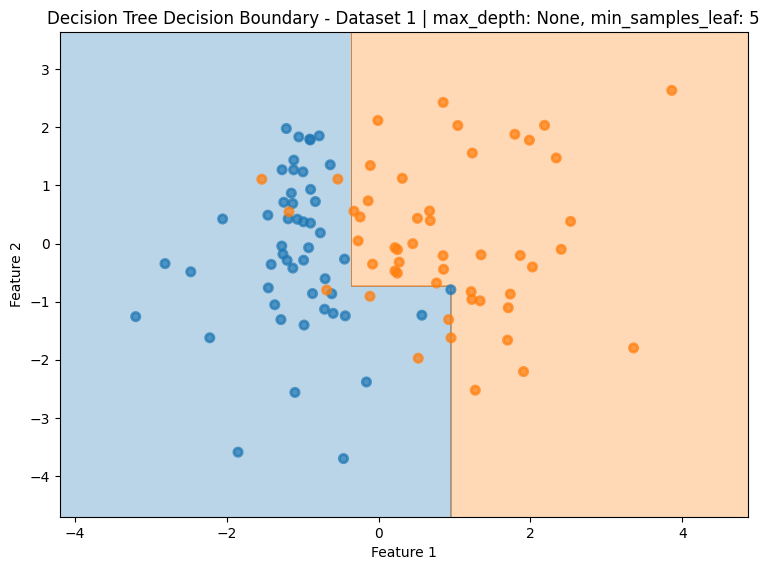

Dataset 1 | max_depth: None, min_samples_leaf: 10 | Train Accuracy: 0.91, Test Accuracy: 0.97


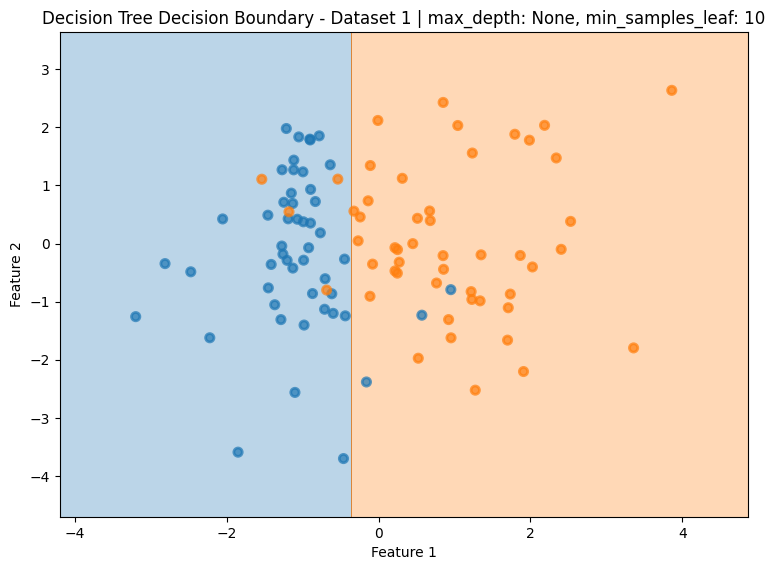

Dataset 1 | max_depth: 1, min_samples_leaf: 1 | Train Accuracy: 0.91, Test Accuracy: 0.97


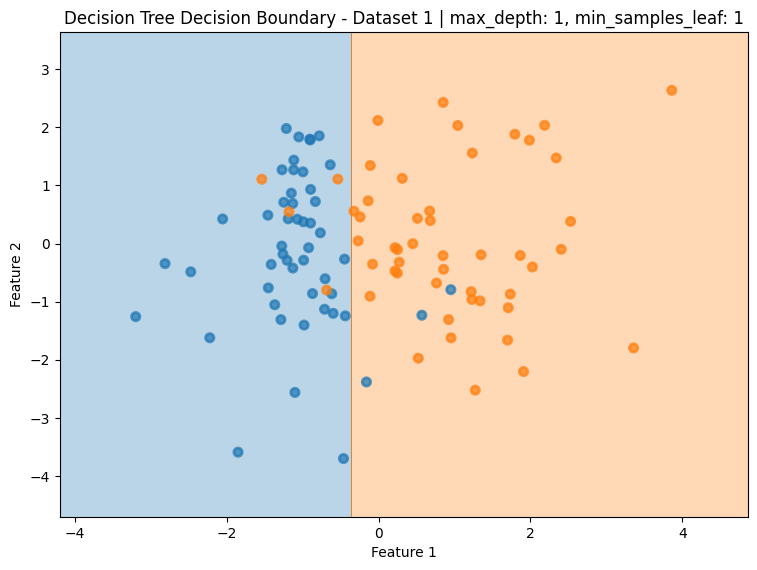

Dataset 1 | max_depth: 1, min_samples_leaf: 2 | Train Accuracy: 0.91, Test Accuracy: 0.97


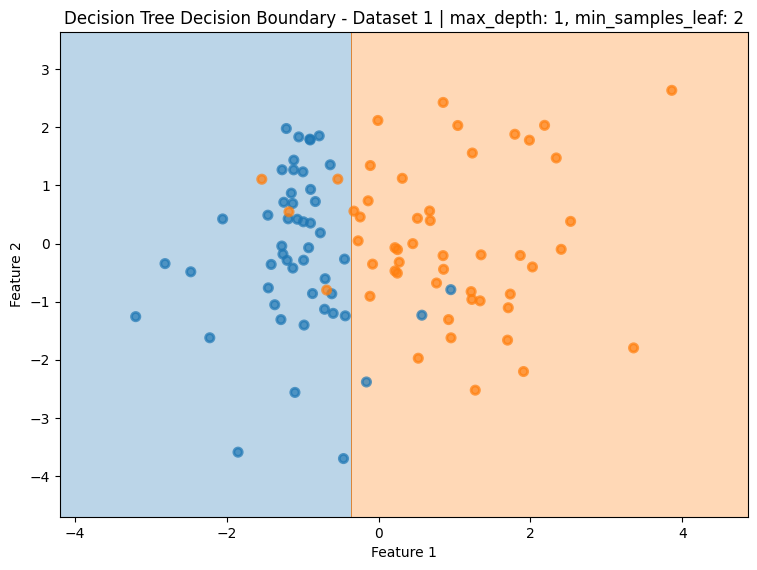

Dataset 1 | max_depth: 1, min_samples_leaf: 5 | Train Accuracy: 0.91, Test Accuracy: 0.97


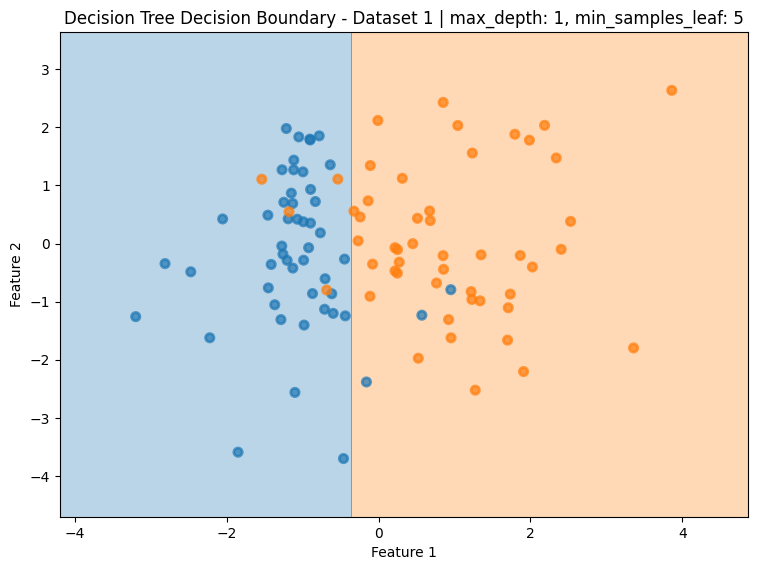

Dataset 1 | max_depth: 1, min_samples_leaf: 10 | Train Accuracy: 0.91, Test Accuracy: 0.97


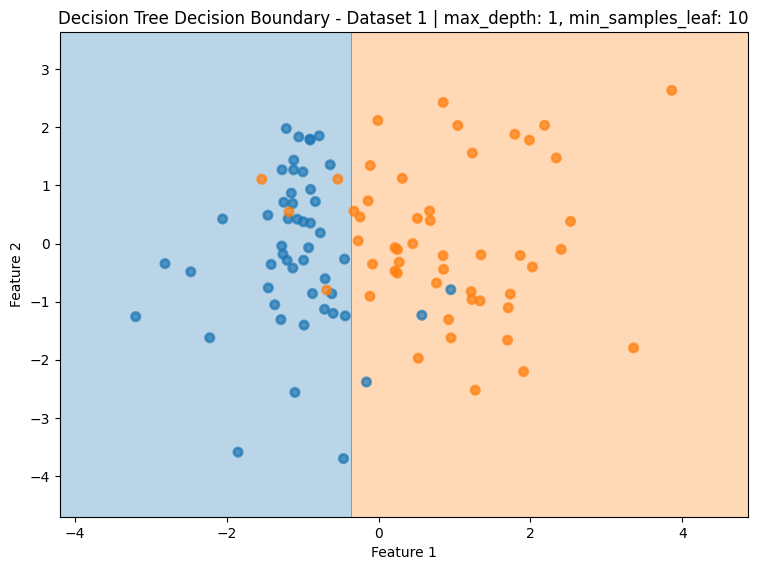

Dataset 1 | max_depth: 2, min_samples_leaf: 1 | Train Accuracy: 0.91, Test Accuracy: 0.97


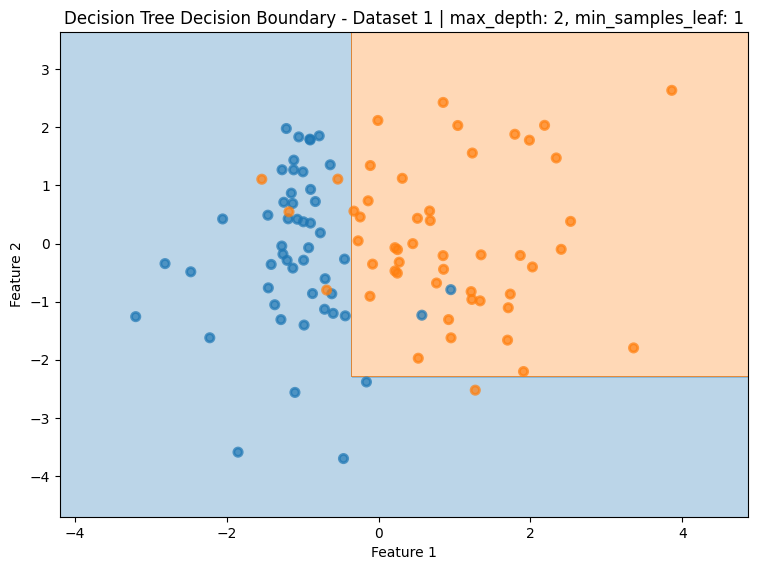

Dataset 1 | max_depth: 2, min_samples_leaf: 2 | Train Accuracy: 0.91, Test Accuracy: 0.97


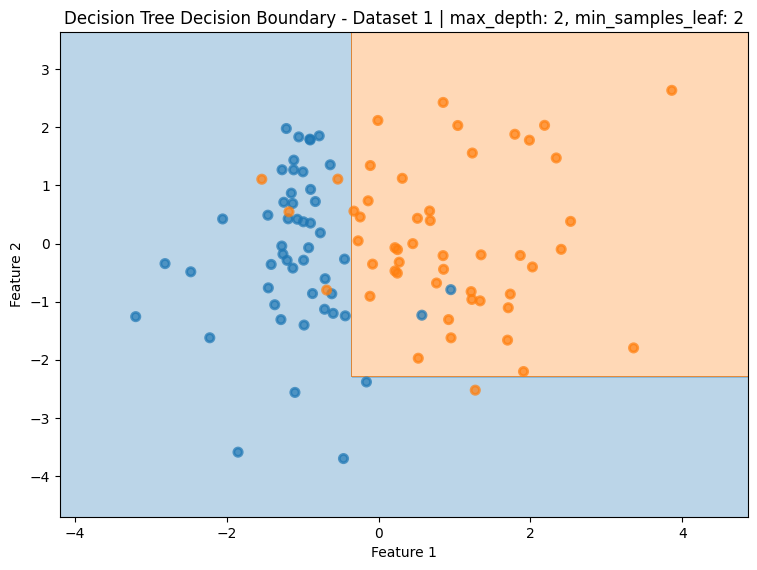

Dataset 1 | max_depth: 2, min_samples_leaf: 5 | Train Accuracy: 0.91, Test Accuracy: 0.97


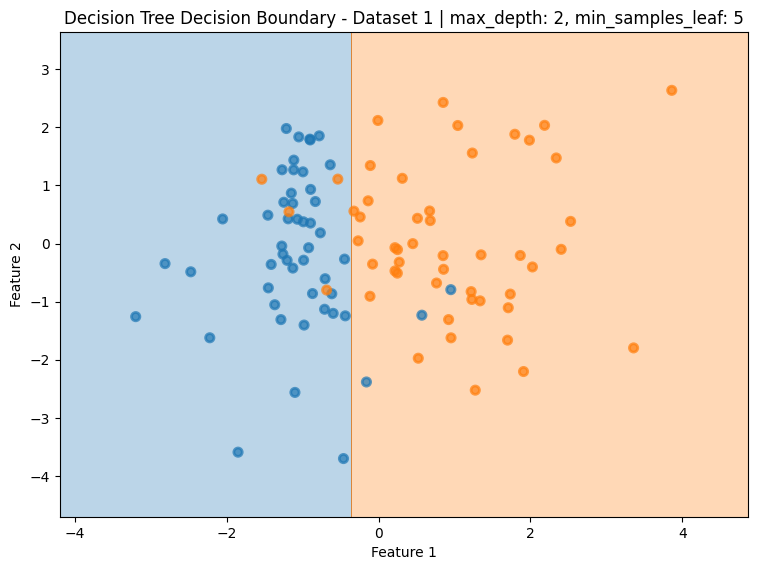

Dataset 1 | max_depth: 2, min_samples_leaf: 10 | Train Accuracy: 0.91, Test Accuracy: 0.97


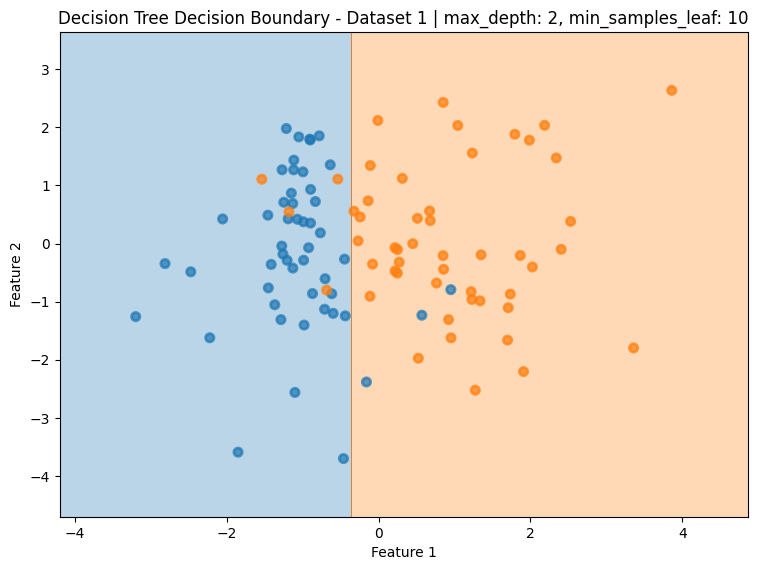

Dataset 1 | max_depth: 3, min_samples_leaf: 1 | Train Accuracy: 0.94, Test Accuracy: 0.97


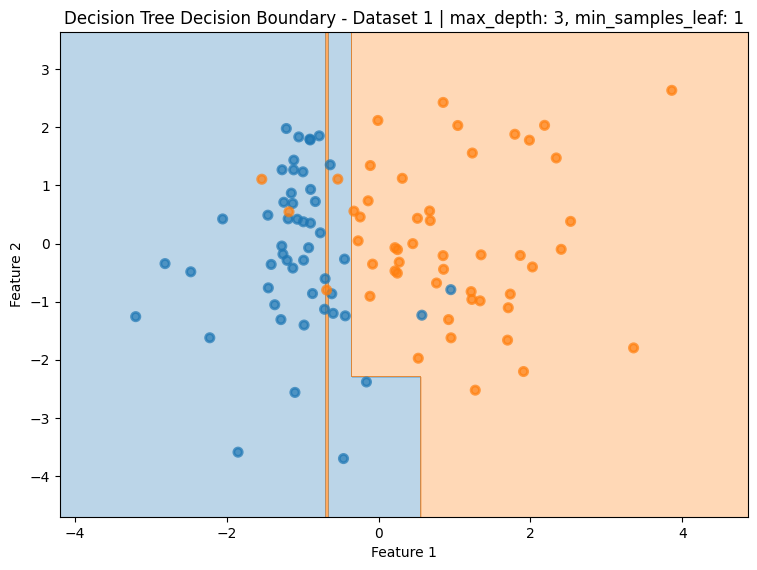

Dataset 1 | max_depth: 3, min_samples_leaf: 2 | Train Accuracy: 0.91, Test Accuracy: 0.97


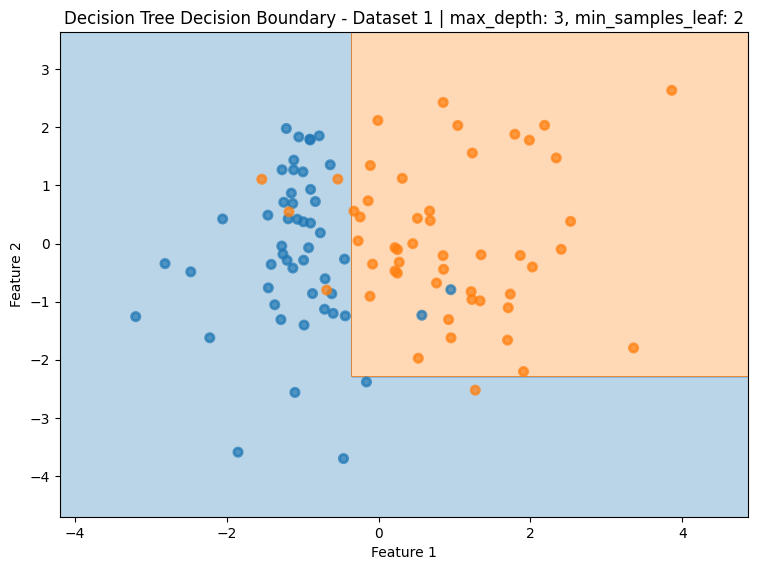

Dataset 1 | max_depth: 3, min_samples_leaf: 5 | Train Accuracy: 0.91, Test Accuracy: 0.97


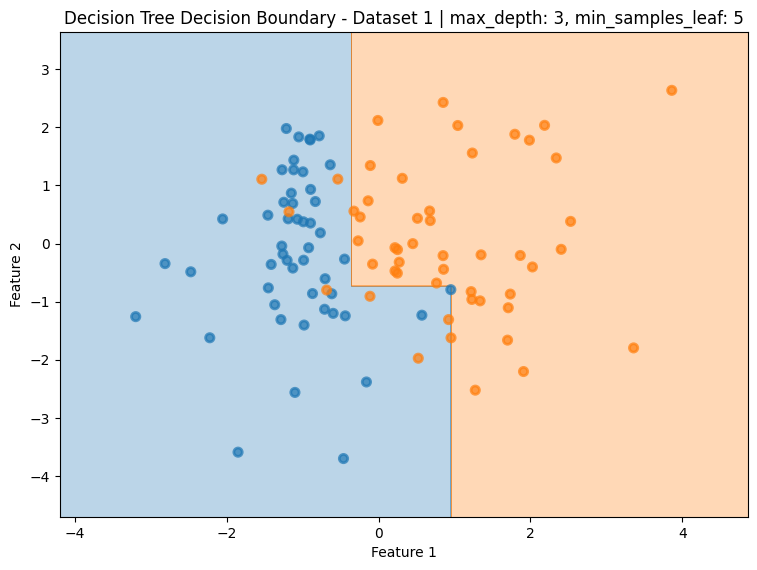

Dataset 1 | max_depth: 3, min_samples_leaf: 10 | Train Accuracy: 0.91, Test Accuracy: 0.97


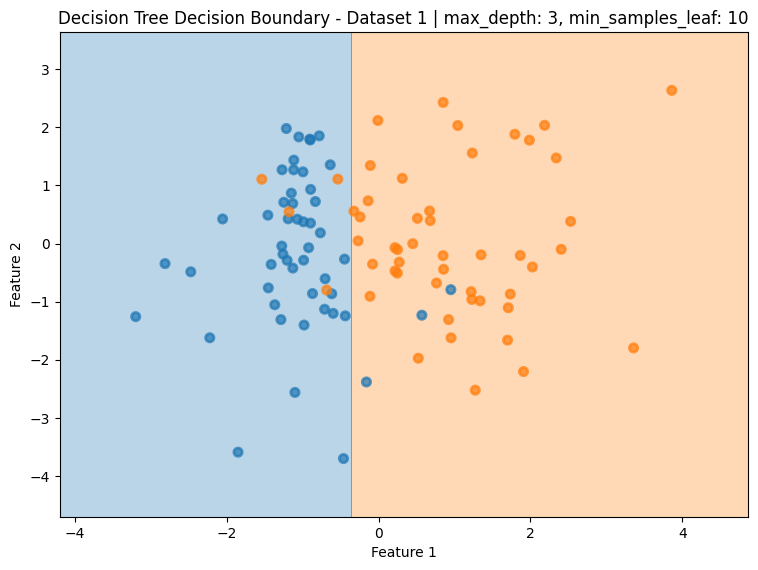

Dataset 1 | max_depth: 5, min_samples_leaf: 1 | Train Accuracy: 0.99, Test Accuracy: 0.97


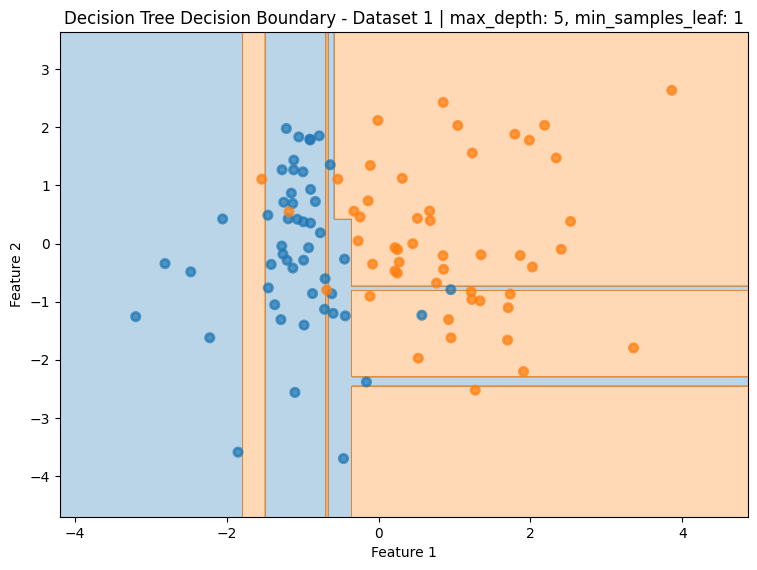

Dataset 1 | max_depth: 5, min_samples_leaf: 2 | Train Accuracy: 0.93, Test Accuracy: 0.97


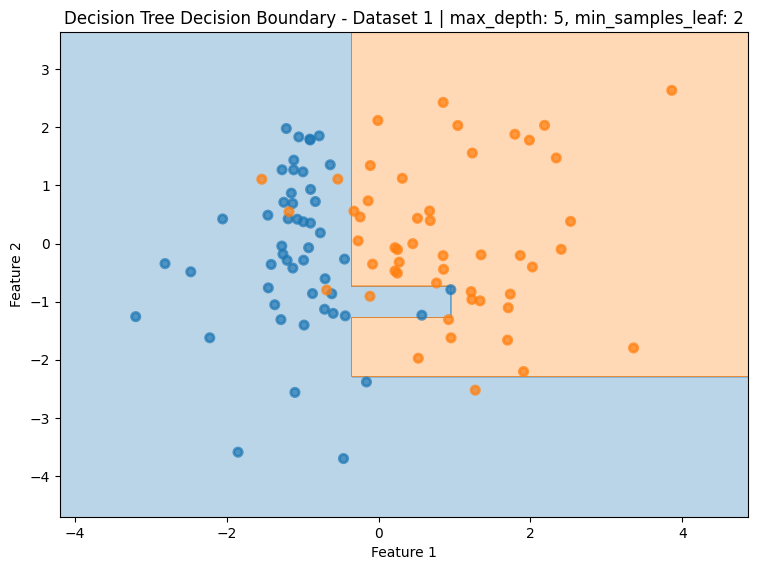

Dataset 1 | max_depth: 5, min_samples_leaf: 5 | Train Accuracy: 0.91, Test Accuracy: 0.97


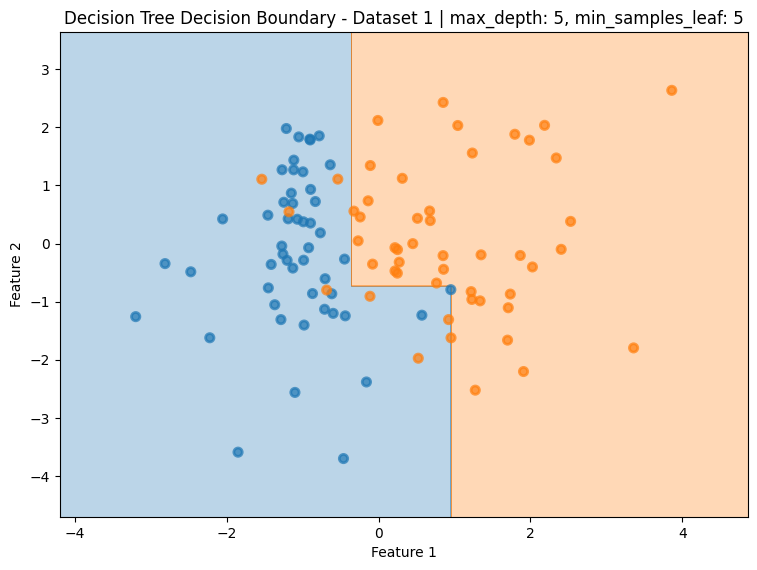

Dataset 1 | max_depth: 5, min_samples_leaf: 10 | Train Accuracy: 0.91, Test Accuracy: 0.97


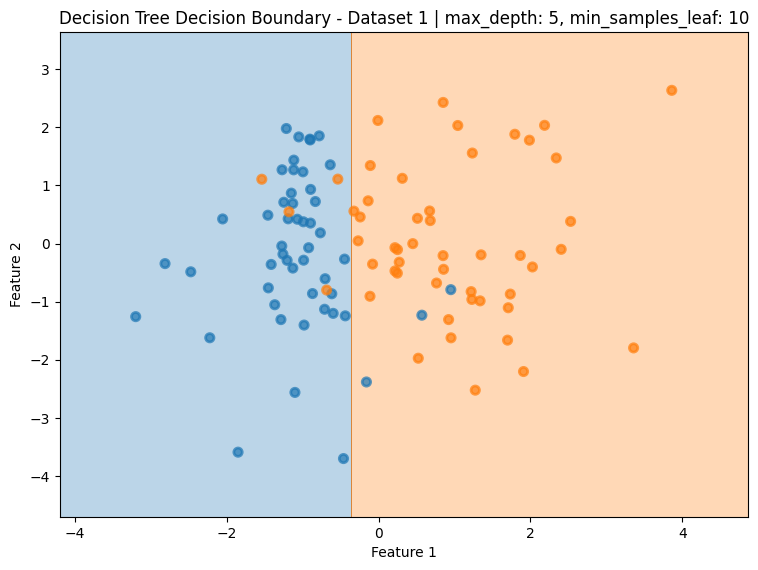

Dataset 2 | max_depth: None, min_samples_leaf: 1 | Train Accuracy: 1.00, Test Accuracy: 0.93


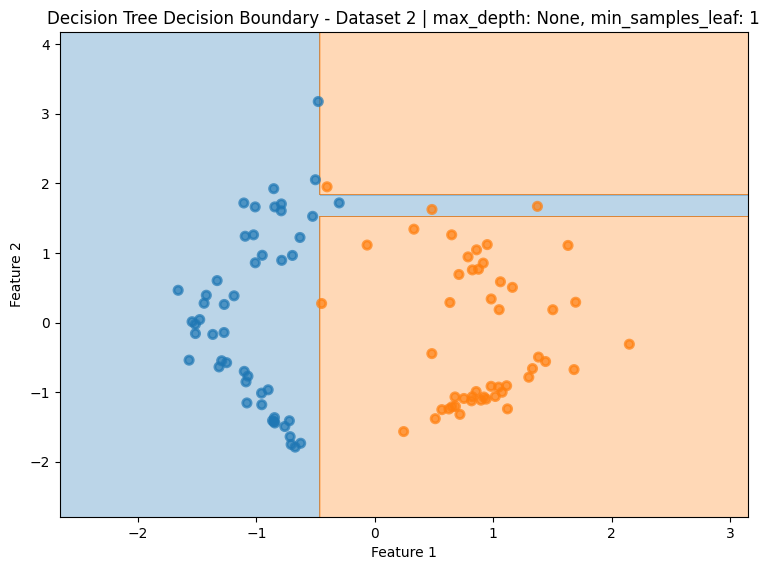

Dataset 2 | max_depth: None, min_samples_leaf: 2 | Train Accuracy: 0.99, Test Accuracy: 0.93


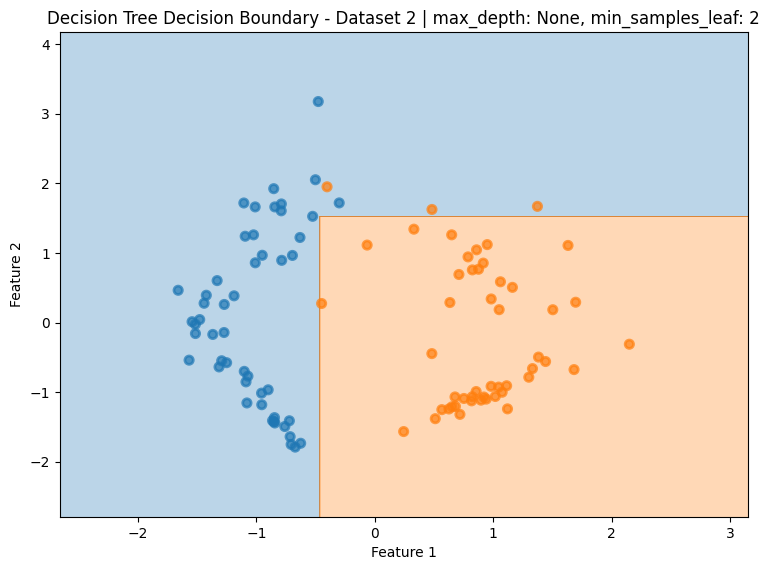

Dataset 2 | max_depth: None, min_samples_leaf: 5 | Train Accuracy: 0.99, Test Accuracy: 1.00


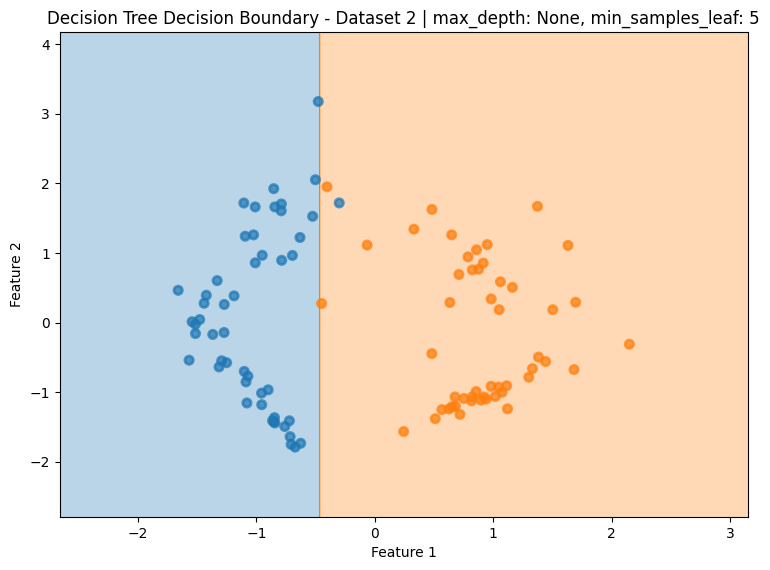

Dataset 2 | max_depth: None, min_samples_leaf: 10 | Train Accuracy: 0.99, Test Accuracy: 1.00


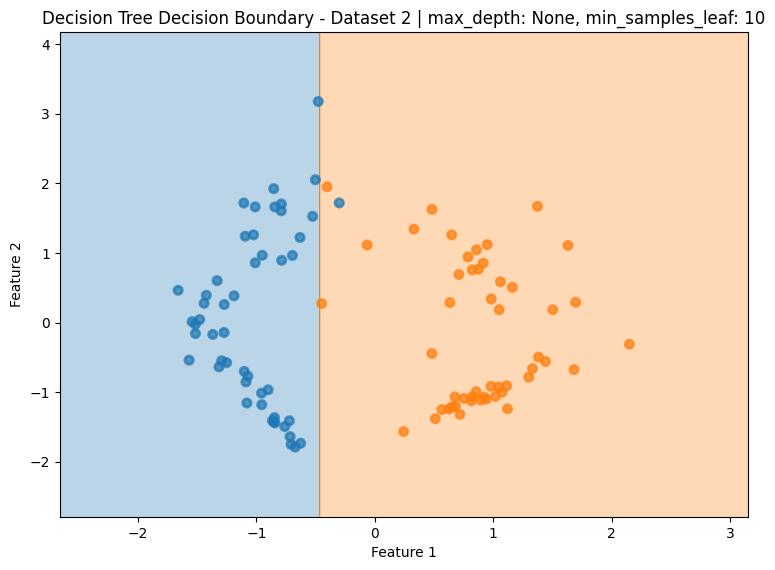

Dataset 2 | max_depth: 1, min_samples_leaf: 1 | Train Accuracy: 0.99, Test Accuracy: 1.00


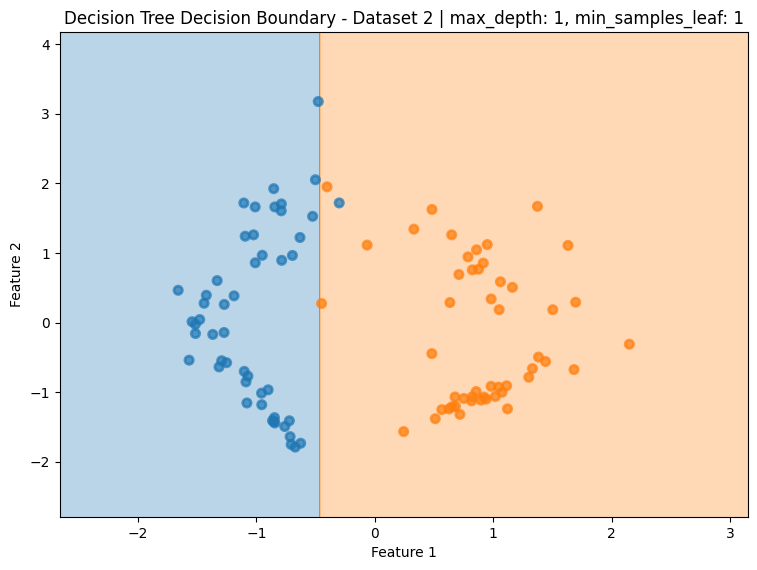

Dataset 2 | max_depth: 1, min_samples_leaf: 2 | Train Accuracy: 0.99, Test Accuracy: 1.00


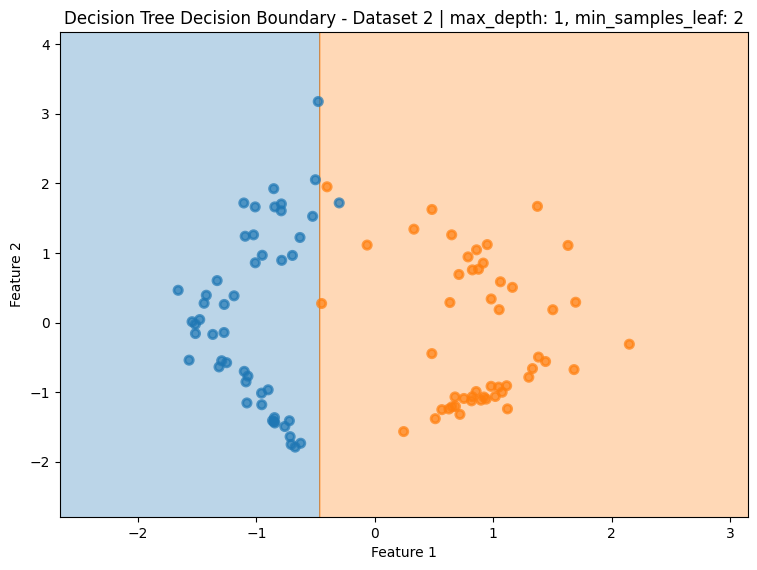

Dataset 2 | max_depth: 1, min_samples_leaf: 5 | Train Accuracy: 0.99, Test Accuracy: 1.00


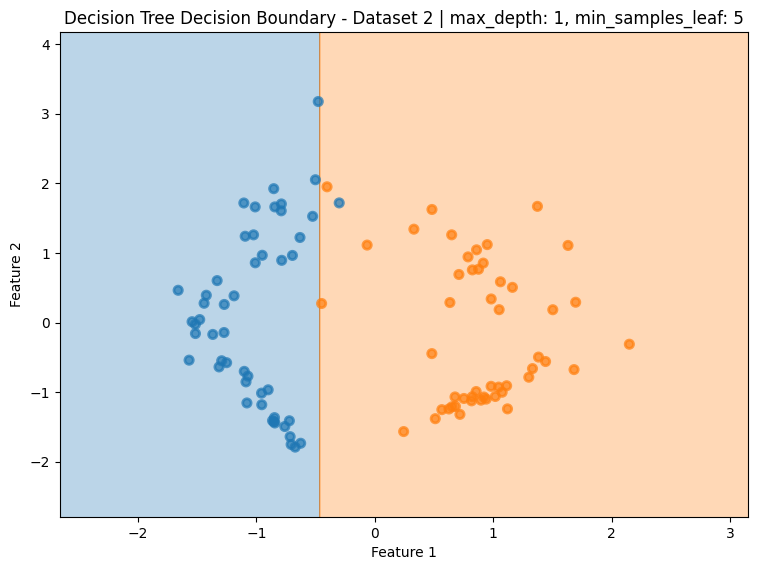

Dataset 2 | max_depth: 1, min_samples_leaf: 10 | Train Accuracy: 0.99, Test Accuracy: 1.00


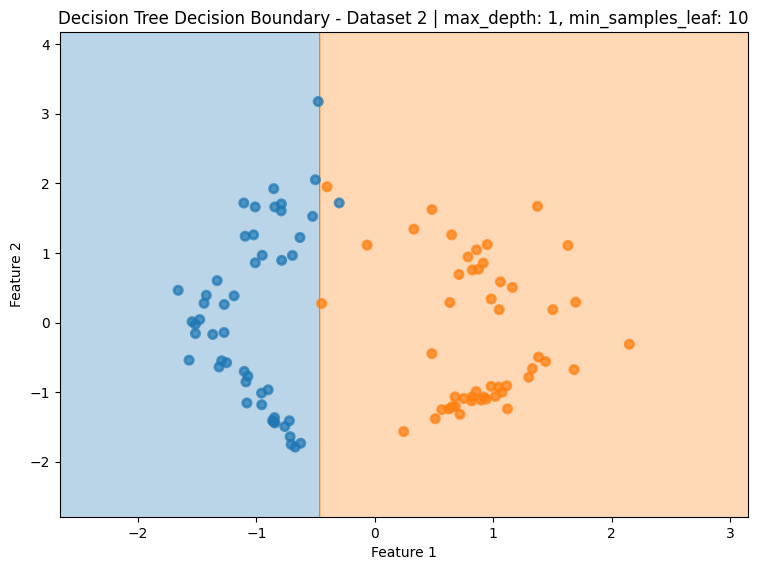

Dataset 2 | max_depth: 2, min_samples_leaf: 1 | Train Accuracy: 0.99, Test Accuracy: 0.93


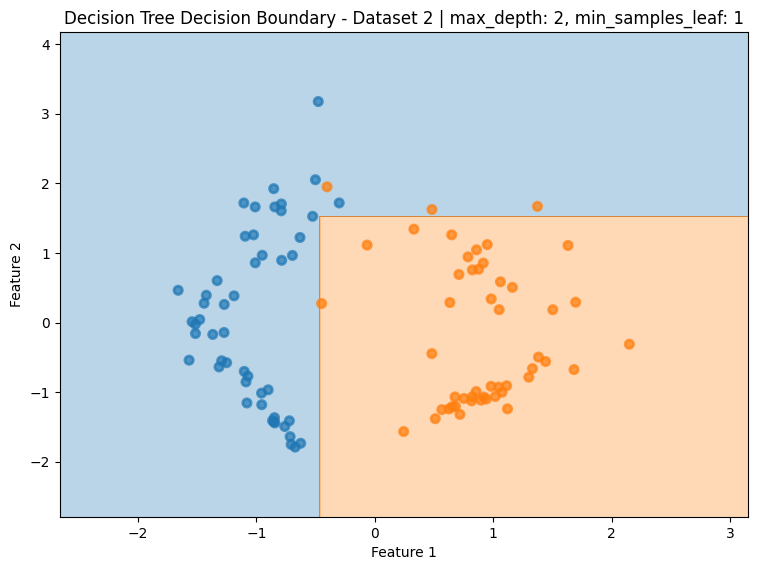

Dataset 2 | max_depth: 2, min_samples_leaf: 2 | Train Accuracy: 0.99, Test Accuracy: 0.93


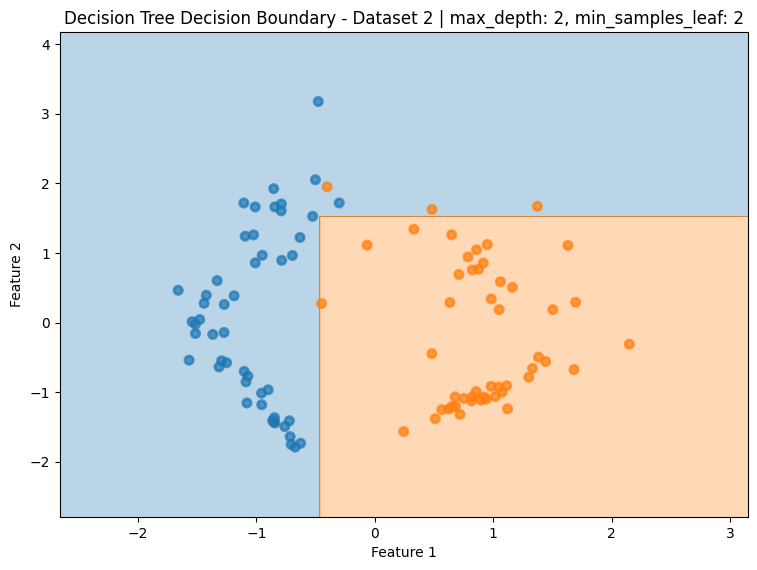

Dataset 2 | max_depth: 2, min_samples_leaf: 5 | Train Accuracy: 0.99, Test Accuracy: 1.00


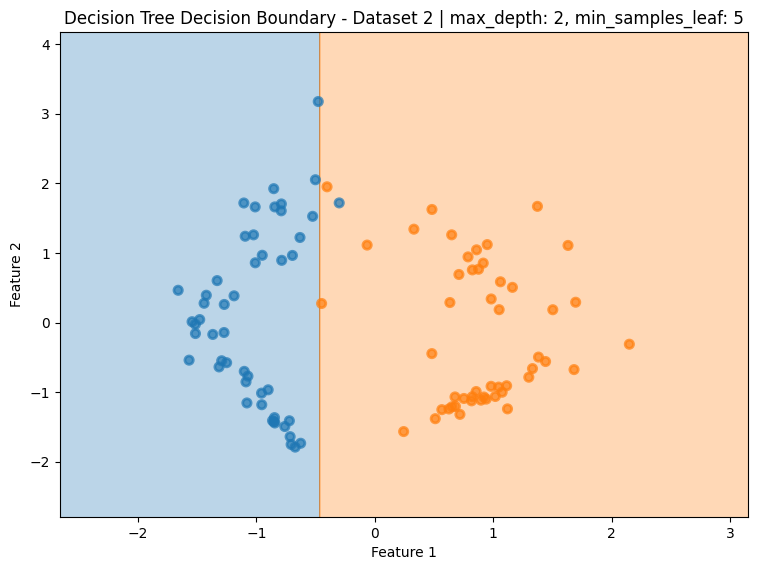

Dataset 2 | max_depth: 2, min_samples_leaf: 10 | Train Accuracy: 0.99, Test Accuracy: 1.00


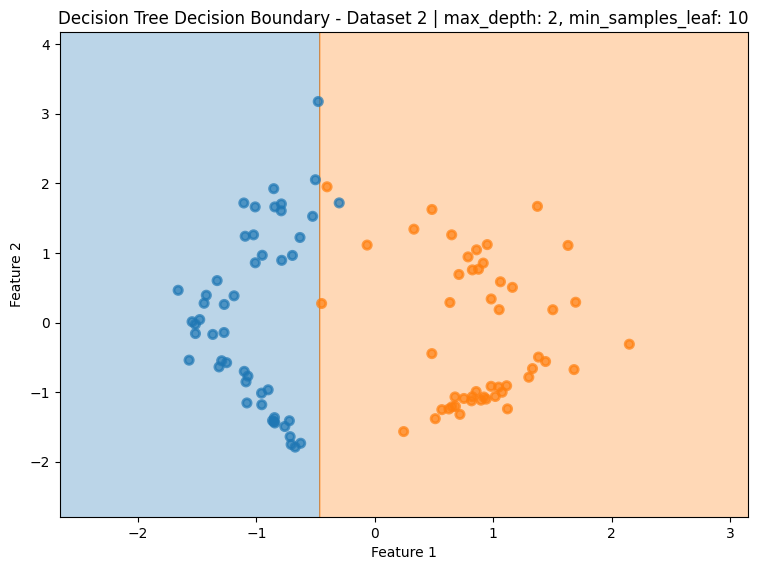

Dataset 2 | max_depth: 3, min_samples_leaf: 1 | Train Accuracy: 1.00, Test Accuracy: 0.93


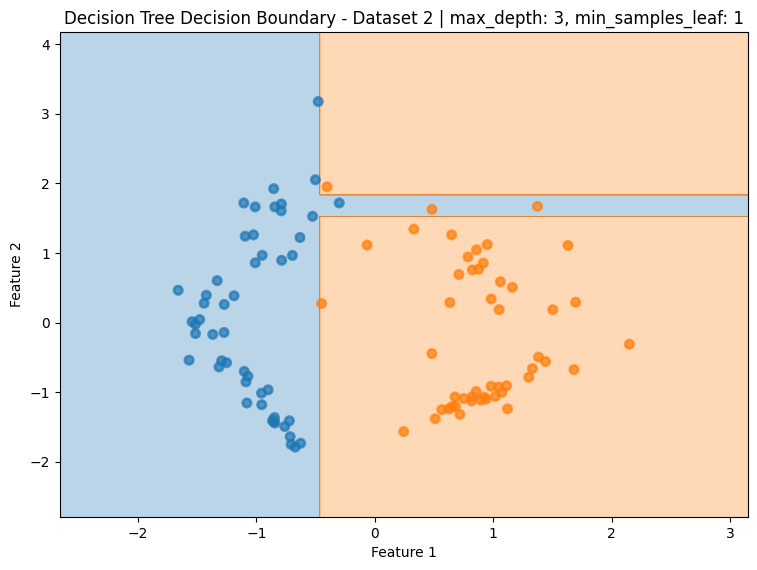

Dataset 2 | max_depth: 3, min_samples_leaf: 2 | Train Accuracy: 0.99, Test Accuracy: 0.93


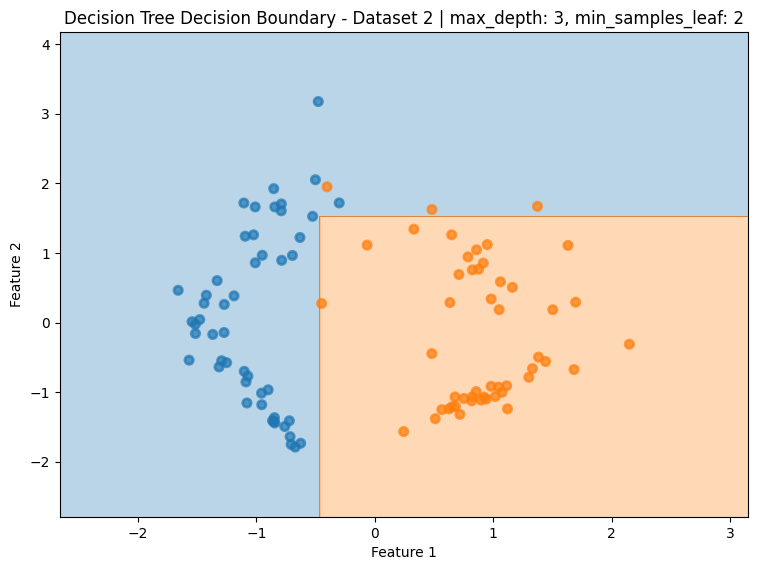

Dataset 2 | max_depth: 3, min_samples_leaf: 5 | Train Accuracy: 0.99, Test Accuracy: 1.00


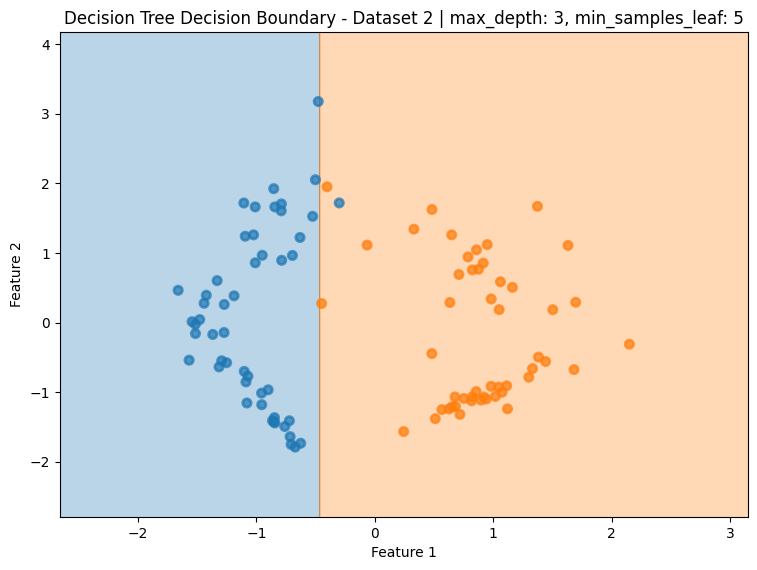

Dataset 2 | max_depth: 3, min_samples_leaf: 10 | Train Accuracy: 0.99, Test Accuracy: 1.00


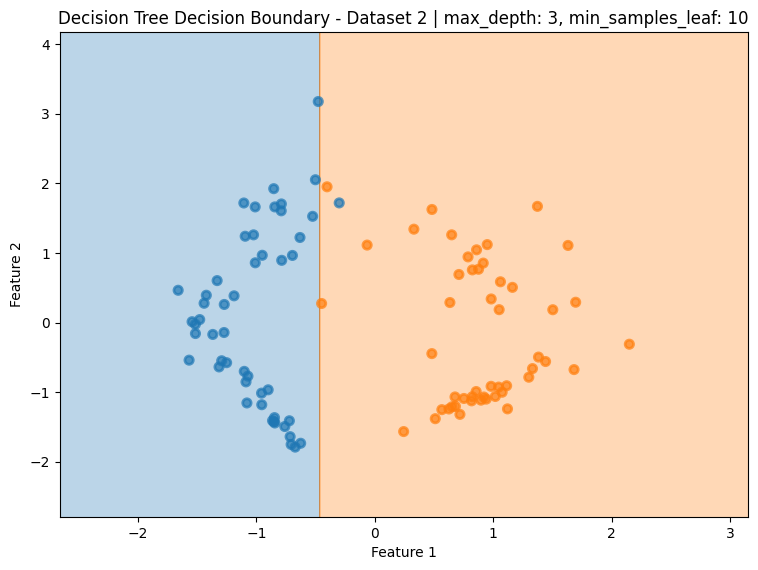

Dataset 2 | max_depth: 5, min_samples_leaf: 1 | Train Accuracy: 1.00, Test Accuracy: 0.93


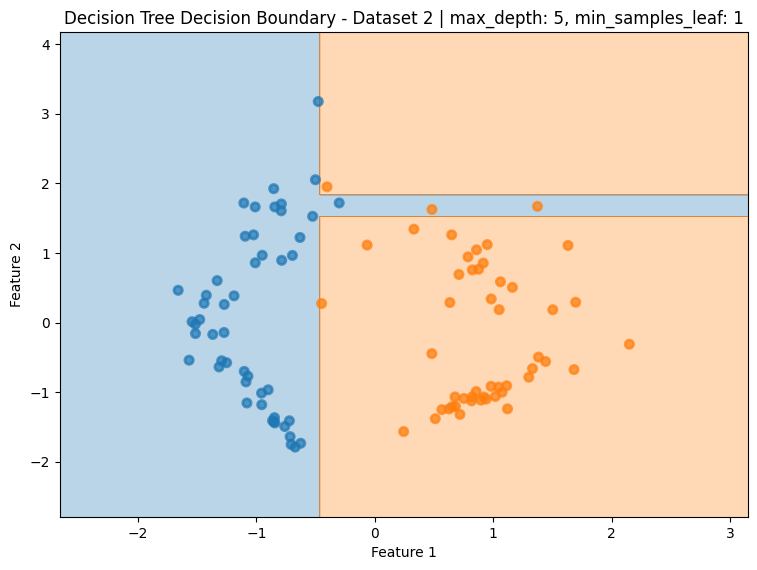

Dataset 2 | max_depth: 5, min_samples_leaf: 2 | Train Accuracy: 0.99, Test Accuracy: 0.93


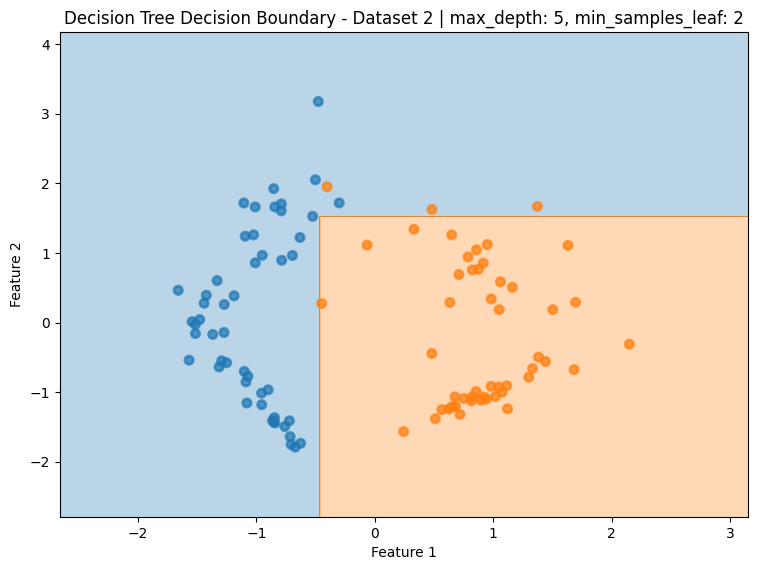

Dataset 2 | max_depth: 5, min_samples_leaf: 5 | Train Accuracy: 0.99, Test Accuracy: 1.00


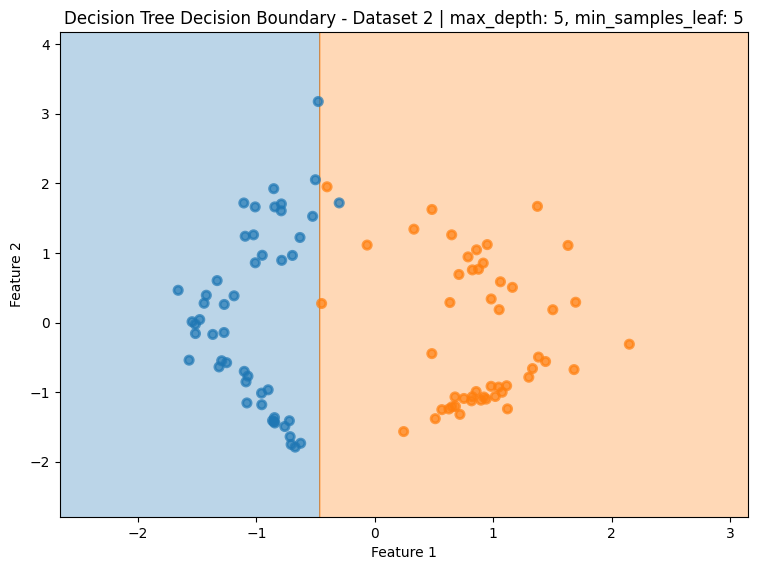

Dataset 2 | max_depth: 5, min_samples_leaf: 10 | Train Accuracy: 0.99, Test Accuracy: 1.00


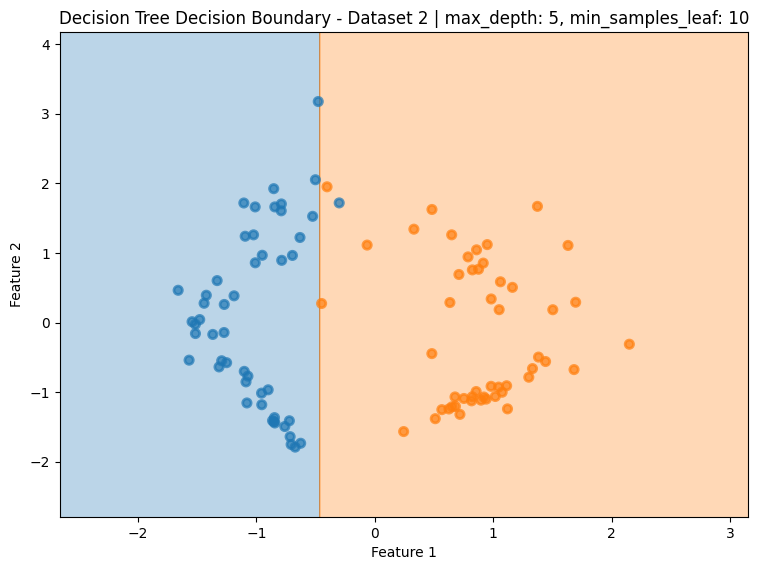

Dataset 3 | max_depth: None, min_samples_leaf: 1 | Train Accuracy: 1.00, Test Accuracy: 0.73


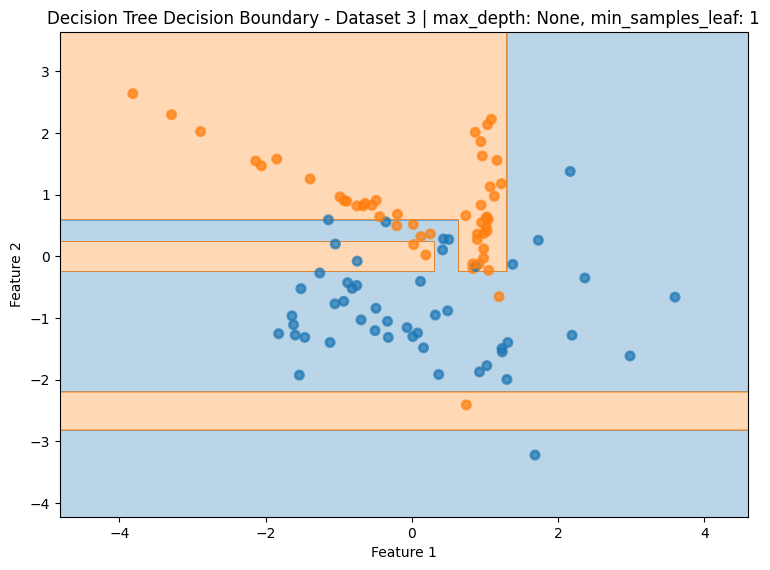

Dataset 3 | max_depth: None, min_samples_leaf: 2 | Train Accuracy: 0.97, Test Accuracy: 0.73


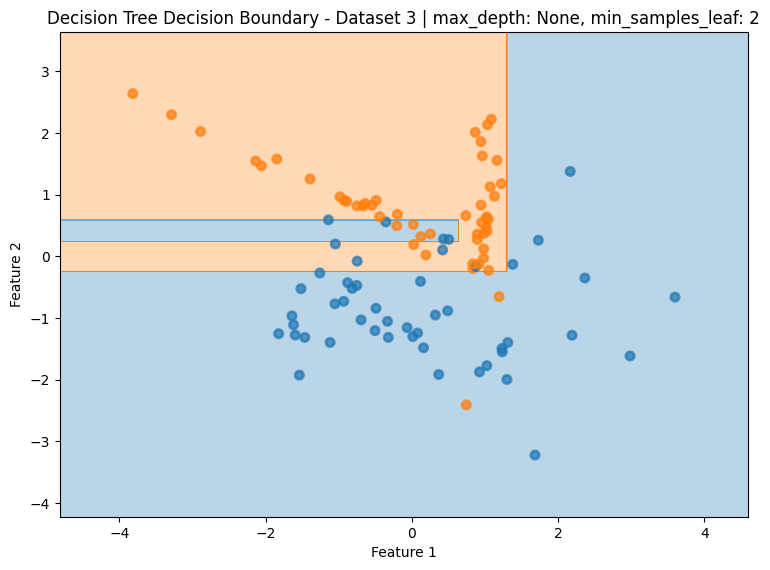

Dataset 3 | max_depth: None, min_samples_leaf: 5 | Train Accuracy: 0.93, Test Accuracy: 0.77


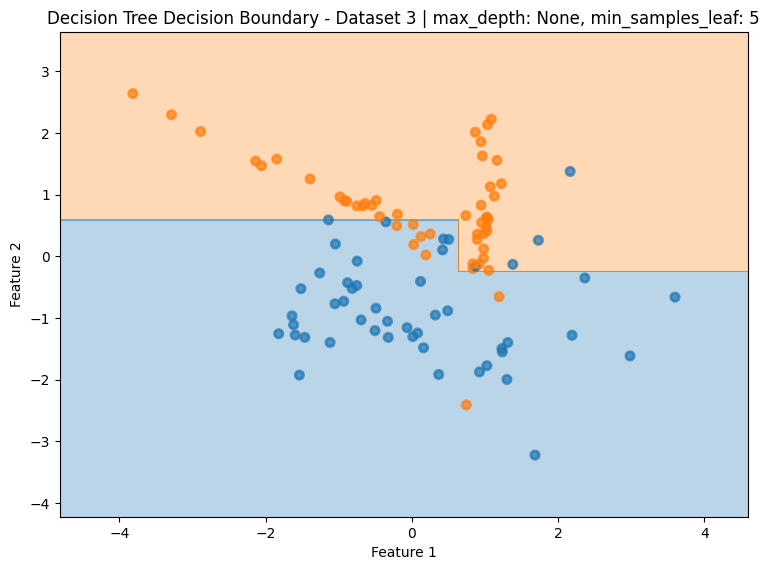

Dataset 3 | max_depth: None, min_samples_leaf: 10 | Train Accuracy: 0.90, Test Accuracy: 0.80


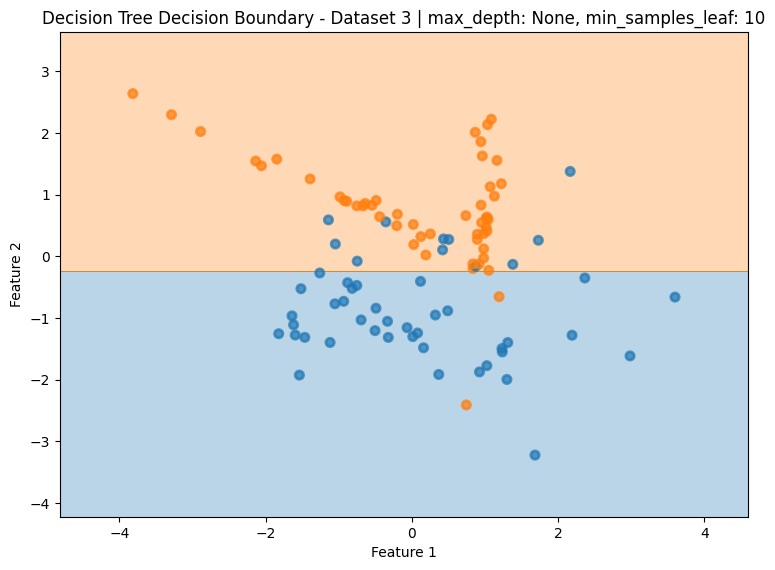

Dataset 3 | max_depth: 1, min_samples_leaf: 1 | Train Accuracy: 0.90, Test Accuracy: 0.80


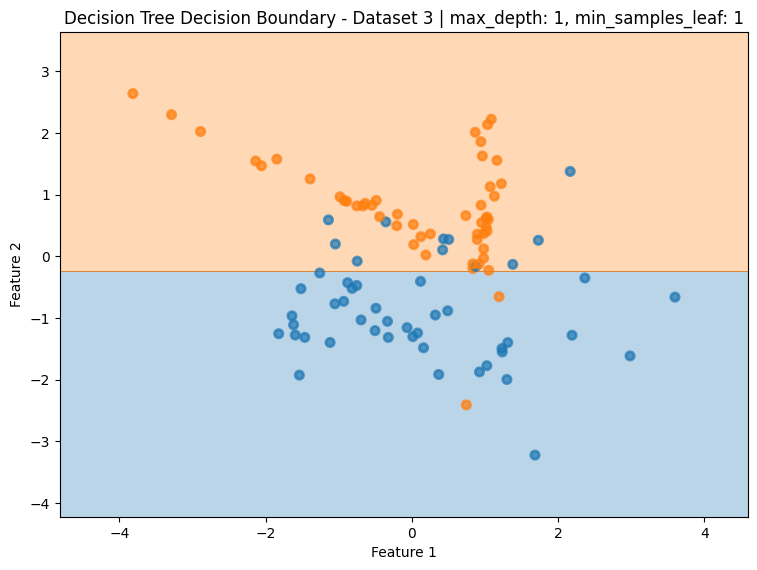

Dataset 3 | max_depth: 1, min_samples_leaf: 2 | Train Accuracy: 0.90, Test Accuracy: 0.80


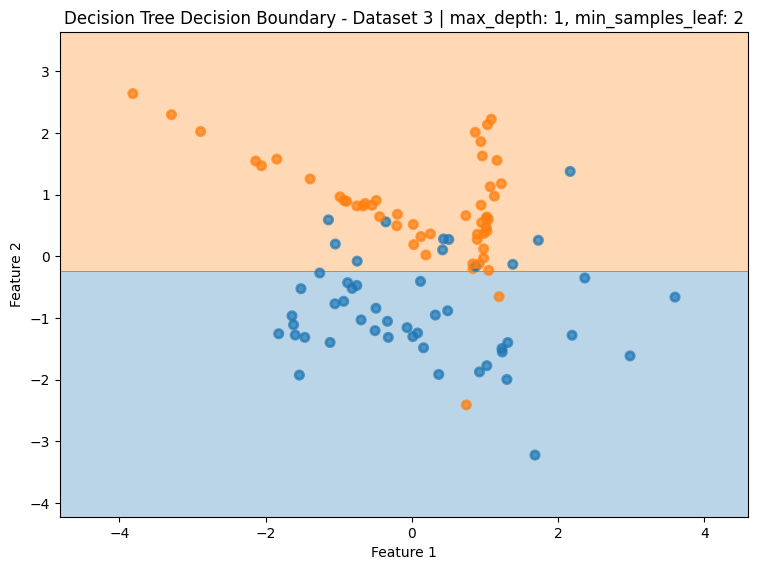

Dataset 3 | max_depth: 1, min_samples_leaf: 5 | Train Accuracy: 0.90, Test Accuracy: 0.80


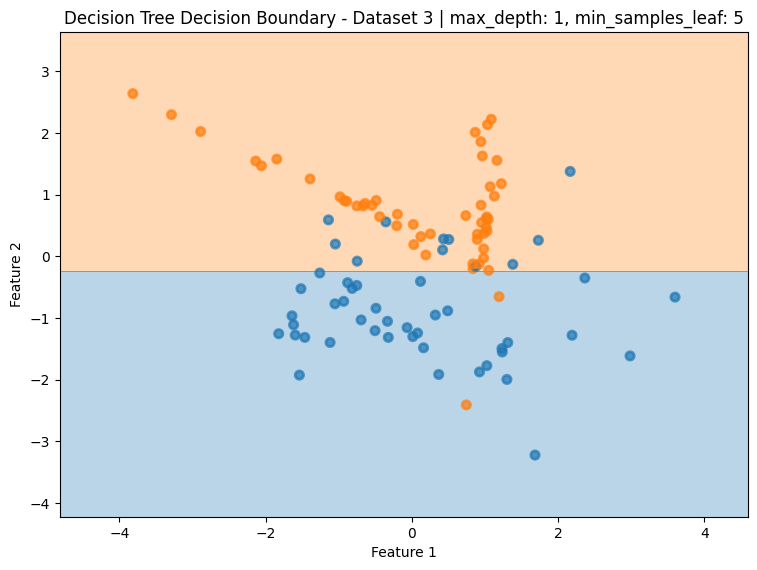

Dataset 3 | max_depth: 1, min_samples_leaf: 10 | Train Accuracy: 0.90, Test Accuracy: 0.80


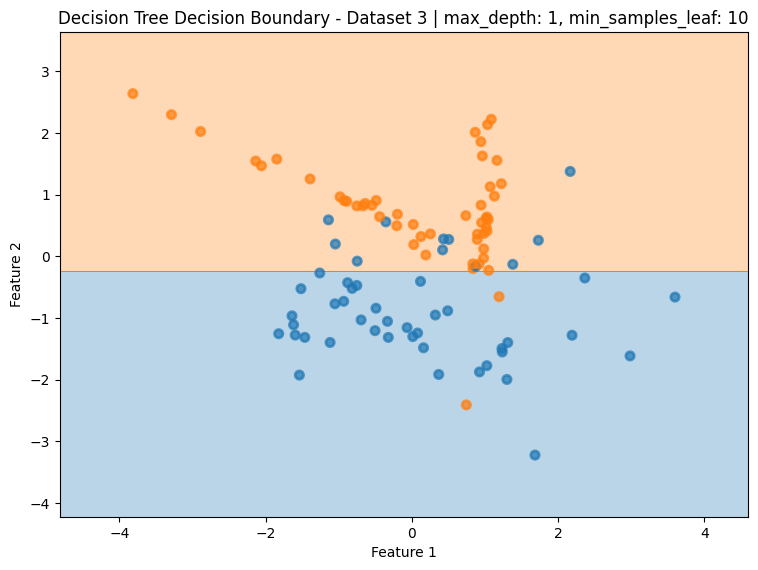

Dataset 3 | max_depth: 2, min_samples_leaf: 1 | Train Accuracy: 0.93, Test Accuracy: 0.83


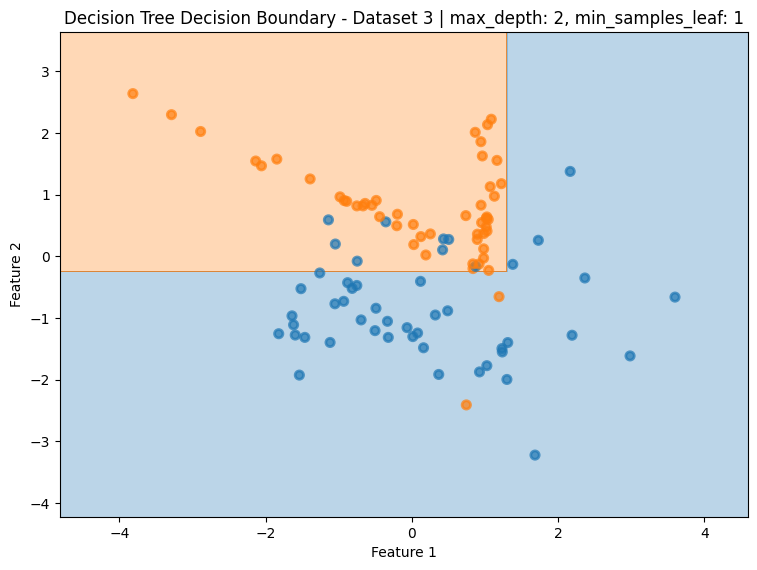

Dataset 3 | max_depth: 2, min_samples_leaf: 2 | Train Accuracy: 0.93, Test Accuracy: 0.83


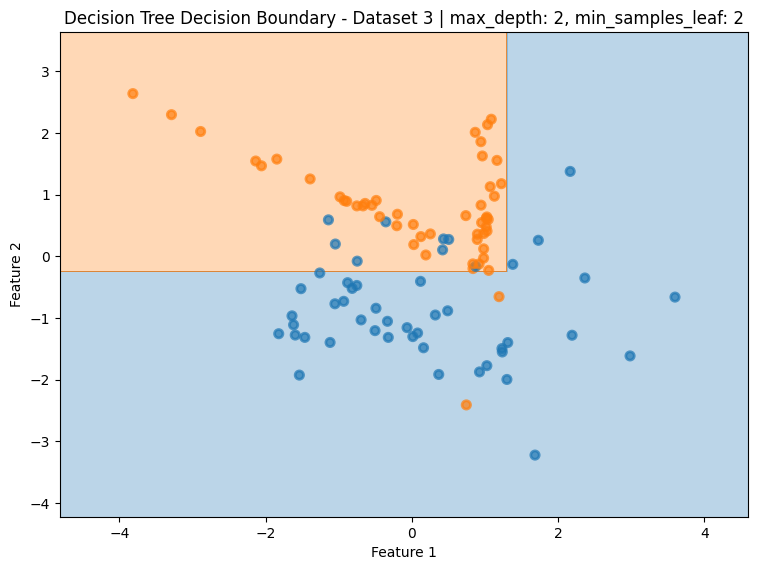

Dataset 3 | max_depth: 2, min_samples_leaf: 5 | Train Accuracy: 0.90, Test Accuracy: 0.80


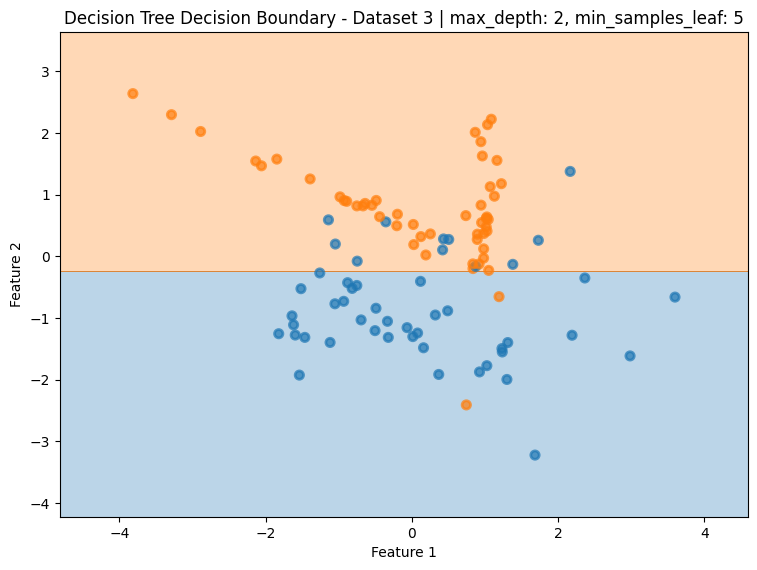

Dataset 3 | max_depth: 2, min_samples_leaf: 10 | Train Accuracy: 0.90, Test Accuracy: 0.80


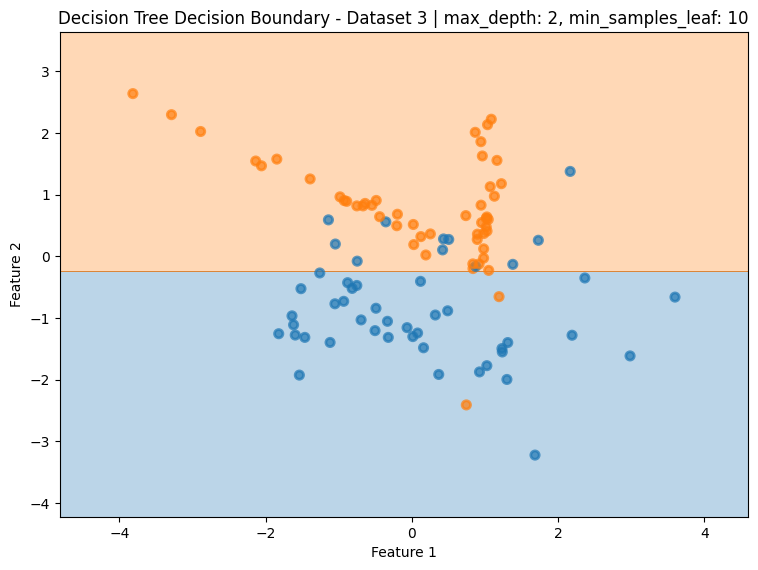

Dataset 3 | max_depth: 3, min_samples_leaf: 1 | Train Accuracy: 0.94, Test Accuracy: 0.83


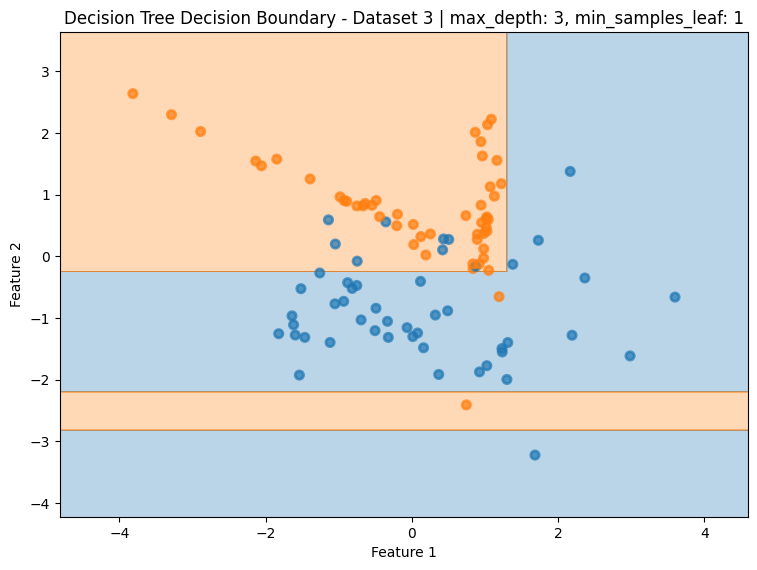

Dataset 3 | max_depth: 3, min_samples_leaf: 2 | Train Accuracy: 0.93, Test Accuracy: 0.83


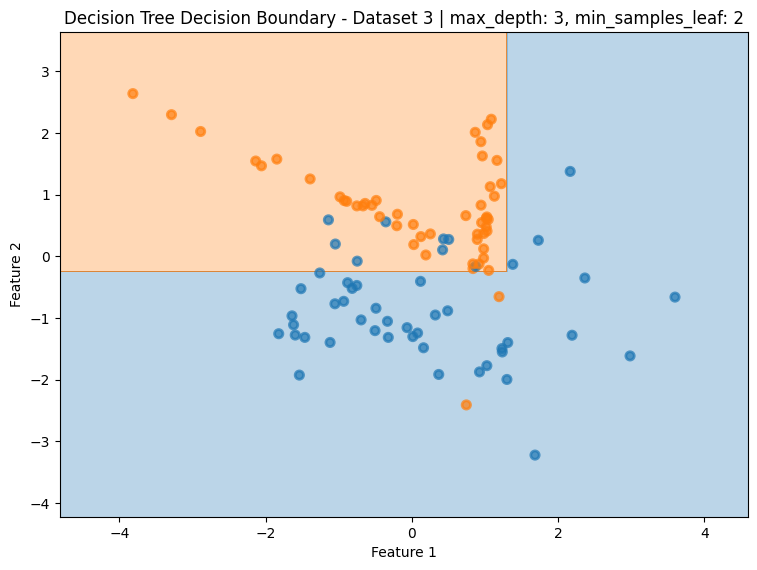

Dataset 3 | max_depth: 3, min_samples_leaf: 5 | Train Accuracy: 0.93, Test Accuracy: 0.77


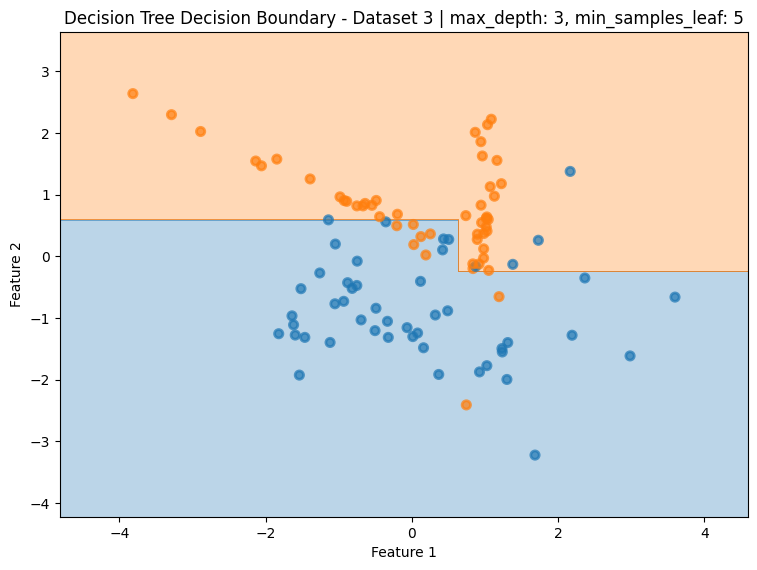

Dataset 3 | max_depth: 3, min_samples_leaf: 10 | Train Accuracy: 0.90, Test Accuracy: 0.80


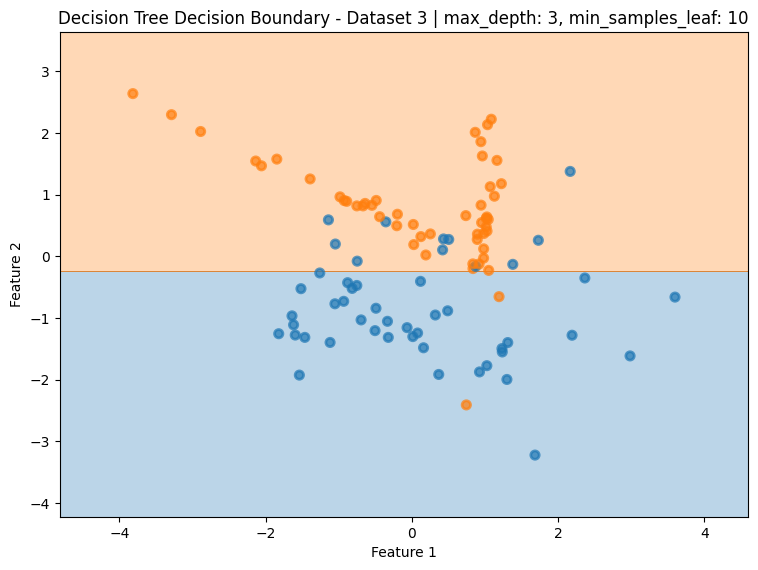

Dataset 3 | max_depth: 5, min_samples_leaf: 1 | Train Accuracy: 0.99, Test Accuracy: 0.73


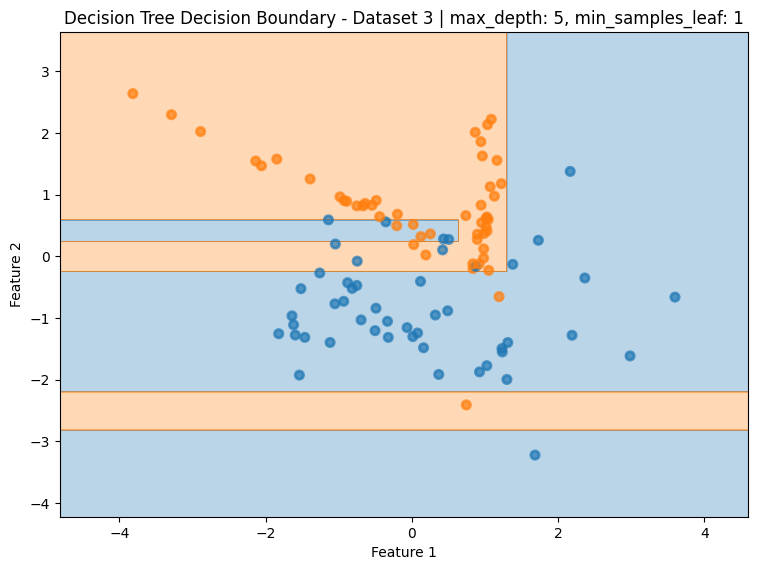

Dataset 3 | max_depth: 5, min_samples_leaf: 2 | Train Accuracy: 0.97, Test Accuracy: 0.73


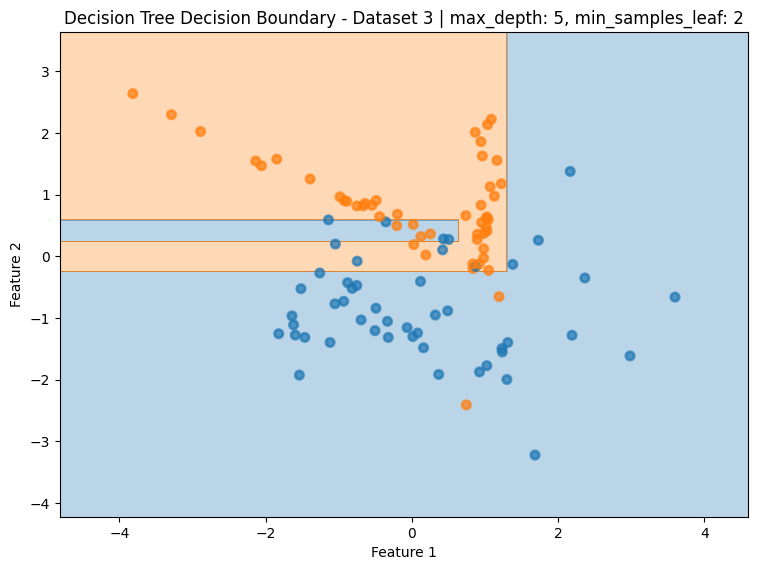

Dataset 3 | max_depth: 5, min_samples_leaf: 5 | Train Accuracy: 0.93, Test Accuracy: 0.77


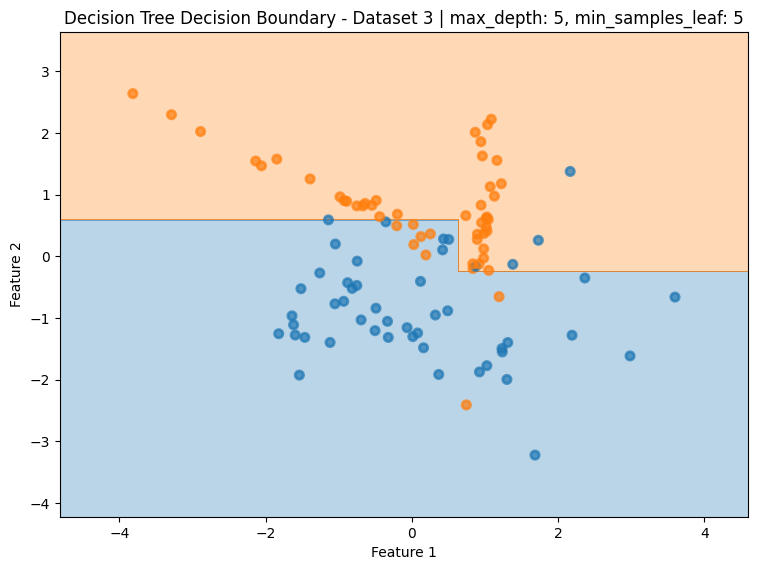

Dataset 3 | max_depth: 5, min_samples_leaf: 10 | Train Accuracy: 0.90, Test Accuracy: 0.80


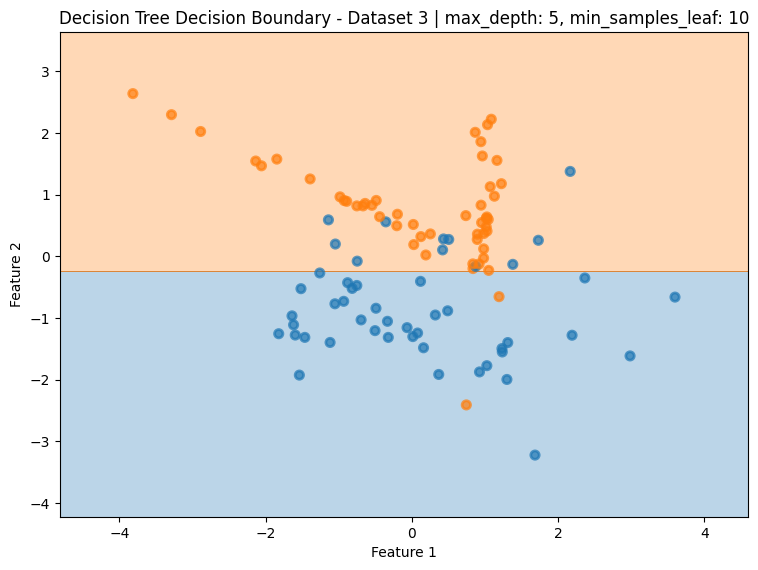

In [4]:
random_state = 42

# Перебираем гиперпараметры
max_depths = [None, 1, 2, 3, 5]
min_samples_leaves = [1, 2, 5, 10]

for i, (X, y) in enumerate(datasets):
    # Фиксированное разбиение на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    for max_depth in max_depths:
        for min_samples_leaf in min_samples_leaves:
            # Обучаем решающее дерево с заданными гиперпараметрами
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=random_state)
            clf.fit(X_train, y_train)

            # Предсказания
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)

            # Вычисляем accuracy
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)

            # Выводим результаты
            print(f"Dataset {i+1} | max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf} | Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")

            # Построение графика
            plt.figure(figsize=(8, 6))
            plt.title(f'Decision Tree Decision Boundary - Dataset {i+1} | max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}')
            plot_surface(clf, X, y)
            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.show()

Изменения в производительности решающего дерева при варьировании гиперпараметров не являются одинаковыми для всех датасетов. Это обусловлено структурными различиями в данных, уровнем сложности, размером выборки и соотношением классов. Анализ результатов для каждого датасета поможет выявить, какие гиперпараметры работают лучше в конкретной ситуации и как они влияют на модель.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [13]:
def find_best_split(feature_vector, target_vector):
    """
    Find the best split for a feature vector using the Gini impurity criterion.

    :param feature_vector: numpy array of feature values
    :param target_vector: numpy array of class labels
    :return: thresholds, ginis, threshold_best, gini_best
    """
    thresholds = []
    ginis = []
    n = len(feature_vector)

    # Получаем уникальные значения и сортируем их
    unique_values = np.unique(feature_vector)
    
    for i in range(len(unique_values) - 1):
        threshold = (unique_values[i] + unique_values[i + 1]) / 2
        left_indices = feature_vector < threshold
        right_indices = feature_vector >= threshold

        if np.any(left_indices) and np.any(right_indices):
            # Вычисляем Джини для левой и правой подвыборок
            gini_left = 1 - sum((np.sum(target_vector[left_indices] == c) / np.sum(left_indices)) ** 2 for c in np.unique(target_vector))
            gini_right = 1 - sum((np.sum(target_vector[right_indices] == c) / np.sum(right_indices)) ** 2 for c in np.unique(target_vector))

            # Общий критерий Джини
            gini = (np.sum(left_indices) * gini_left + np.sum(right_indices) * gini_right) / n
            
            thresholds.append(threshold)
            ginis.append(gini)

    # Находим наилучший порог
    if ginis:
        min_gini_index = np.argmin(ginis)
        return thresholds, ginis, thresholds[min_gini_index], ginis[min_gini_index]
    else:
        return [], [], None, None

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

file_path = 'students.xls'  # Убедитесь, что файл находится в текущем каталоге
df = pd.read_excel(file_path)

X = data.iloc[:, :-1]  # Первые пять столбцов - признаки
y = data.iloc[:, -1]   # Последний столбец - целевая переменная


In [75]:
# Функция для вычисления критерия Джини для каждого признака
def gini_curve(X, y, feature_index):
    thresholds = np.sort(X.iloc[:, feature_index].unique())
    gini_values = []
    
    for threshold in thresholds:
        # Делим выборку на две части по порогу
        left = y[X.iloc[:, feature_index] <= threshold]
        right = y[X.iloc[:, feature_index] > threshold]
        
        # Вычисляем критерий Джини для левой и правой частей
        gini_left = 1 - sum((np.sum(left == c) / len(left)) ** 2 for c in np.unique(y)) if len(left) > 0 else 0
        gini_right = 1 - sum((np.sum(right == c) / len(right)) ** 2 for c in np.unique(y)) if len(right) > 0 else 0
        
        # Общий критерий Джини
        gini = (len(left) * gini_left + len(right) * gini_right) / len(y)
        gini_values.append(gini)
    
    return thresholds, gini_values


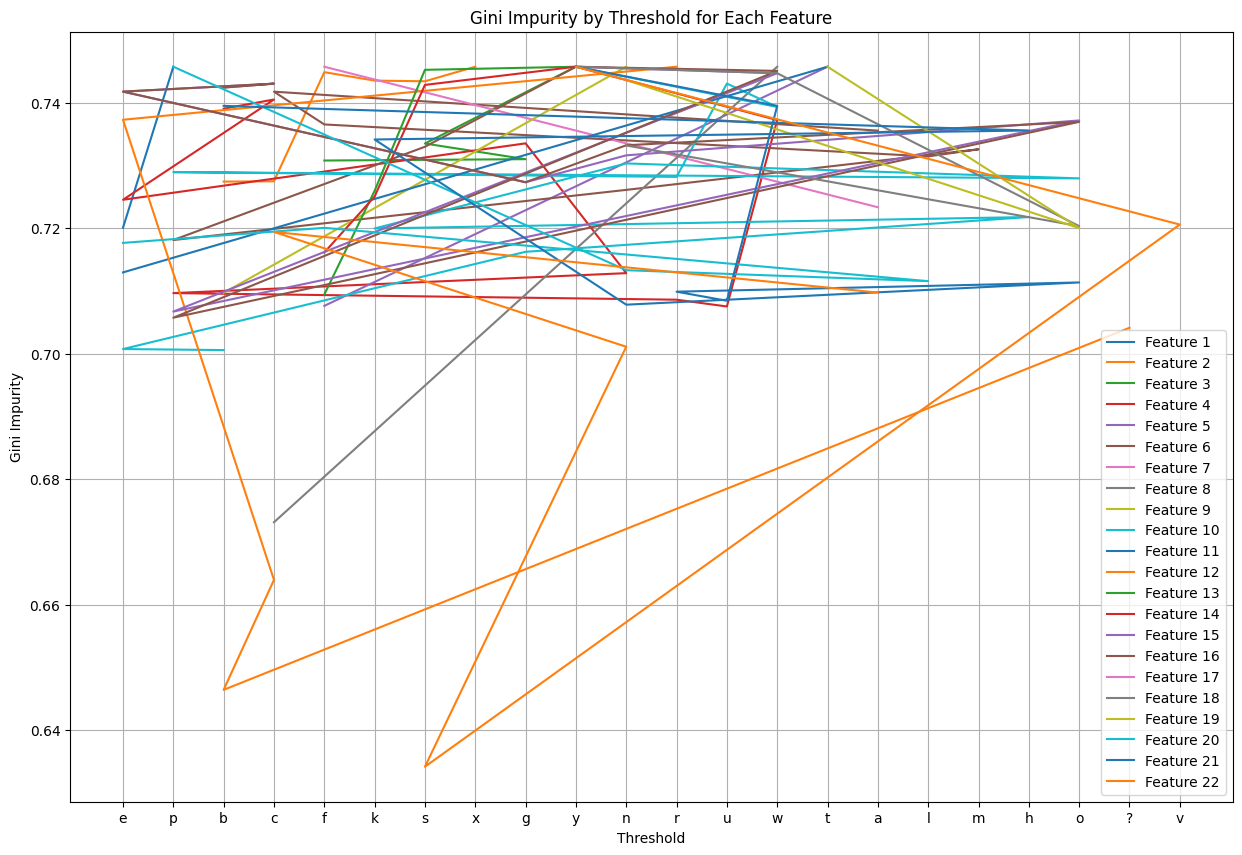

In [76]:
# Построение кривых "порог — значение критерия Джини"
plt.figure(figsize=(15, 10))
for i in range(X.shape[1]):
    thresholds, gini_values = gini_curve(X, y, i)
    plt.plot(thresholds, gini_values, label=f'Feature {i + 1}')

plt.title("Gini Impurity by Threshold for Each Feature")
plt.xlabel("Threshold")
plt.ylabel("Gini Impurity")
plt.legend()
plt.grid()
plt.show()

ValueError: num must be an integer with 1 <= num <= 6, not 7

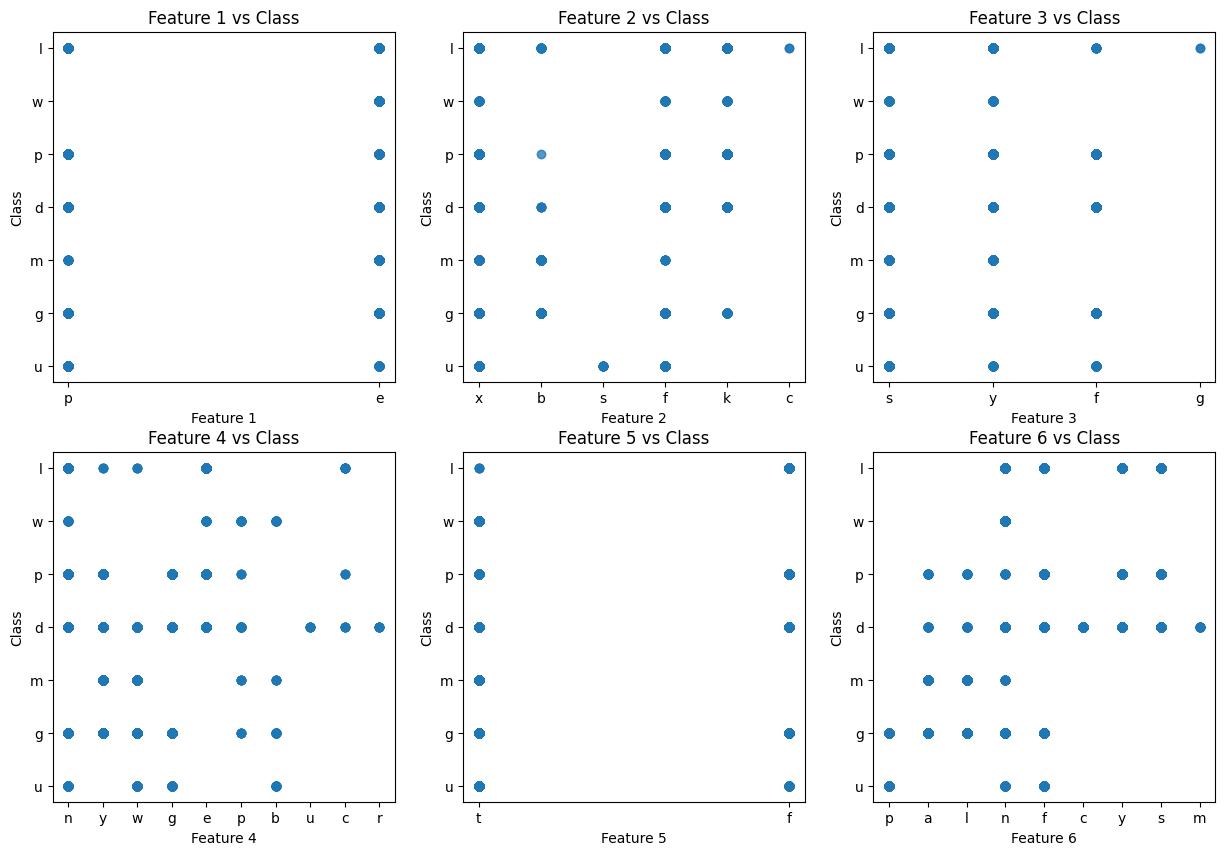

In [77]:
# Визуализация scatter-графиков
plt.figure(figsize=(15, 10))
for i in range(X.shape[1]):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X.iloc[:, i], y, alpha=0.5)
    plt.title(f'Feature {i + 1} vs Class')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Class')

plt.tight_layout()
plt.show()


__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

Оптимальный признак для разбиения: По графикам "порог — значение критерия Джини" можно определить, какой признак обеспечивает наименьшее значение критерия Джини для оптимального порога. Чем ниже значение критерия Джини, тем лучше разбиение.

Согласование с scatter-графиками: Мы ожидаем, что признак, обеспечивающий минимальное значение Джини, визуально на scatter-графике должен лучше разделять классы. То есть, точки разных классов будут более четко сгруппированы относительно порога.

Характеристика "хороших" признаков: Для "хороших" признаков кривые Джини имеют явные минимумы, что указывает на порог, при котором критерий Джини достигает минимума. Это значит, что при разбиении выборки по этому порогу классы делятся на два поддерева с минимальной примесью.

Отличия для "плохих" признаков: Кривые для признаков, которые плохо разделяют классы, имеют высокие и плавные значения Джини, без четко выраженных минимумов. Это указывает на отсутствие хорошего порога для разбиения выборки по этим признакам.

**Ответ:**

### 1. Признак для деления выборки
- **Выбор признака**: Для определения наилучшего признака для деления выборки на два поддерева, нужно обратить внимание на кривую Джини. Признак с наивысшим значением критерия Джини при определенном пороге будет наилучшим кандидатом для разделения. Например, если одна из кривых показывает резкое увеличение значения Джини, это говорит о том, что выборка хорошо разделяется по этому признаку.

### 2. Согласование с scatter-графиками
- **Согласование результатов**: Если выбор признака для деления совпадает с тем, что мы наблюдаем на scatter-графиках, это подтверждает, что признак эффективно разделяет классы. Например, если scatter-график показывает, что значения одного класса (0 или 1) сосредоточены в одной области, а значения другого класса — в другой, это согласуется с высоким значением критерия Джини для этого признака.

### 3. Характеристика "хороших" признаков
- **Вид кривой для хороших признаков**: Для "хороших" признаков, которые позволяют почти идеальное разделение, кривая значения критерия Джини будет показывать значительный рост, достигая значений близких к 1. Это указывает на то, что даже небольшие изменения в значении признака приводят к четкому различию классов. Кривая может быть сильно изогнутой, показывая высокую чувствительность к порогу.

### 4. Отличия для "плохих" признаков
- **Кривые для плохих признаков**: Для признаков, которые не позволяют провести эффективное разделение, кривая Джини будет плоской и колебаться вокруг низких значений, возможно, около 0. Это указывает на то, что изменение порога не меняет распределение классов, так как классы пересекаются и значения перекрываются.

### Итоговый вывод
- Определение признака для деления должно основываться на максимальных значениях критерия Джини, согласующихся с визуальной оценкой scatter-графиков.
- Хорошие признаки имеют четко выраженные, изогнутые кривые, в то время как плохие признаки показывают плоские кривые с низкими значениями Джини.

Эти наблюдения позволяют сделать выводы о значимости признаков и их эффективности для построения моделей классификации.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [51]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator

class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self.feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf


    def _fit_node(self, sub_X, sub_y, node):
            if len(set(sub_y)) == 1:
                node["type"] = "terminal"
                node["class"] = sub_y[0]
                return
        
            feature_best, threshold_best, gini_best, split = None, None, None, None
            for feature in range(sub_X.shape[1]):
                feature_vector = sub_X[:, feature]
        
                # Пропускаем константные признаки
                if len(np.unique(feature_vector)) < 2:
                    continue
        
                thresholds, ginis, threshold, gini = find_best_split(feature_vector, sub_y)
        
                if gini_best is None or (gini < gini_best):  # Используем наименьший гини
                    feature_best = feature
                    gini_best = gini
                    threshold_best = threshold
                    split = feature_vector < threshold
        
            if feature_best is None:
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
        
            node["type"] = "nonterminal"
            node["feature_split"] = feature_best
            node["threshold"] = threshold_best
            node["left_child"], node["right_child"] = {}, {}
            
            self._fit_node(sub_X[split], sub_y[split], node["left_child"])
            self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]
        
        feature_value = x[node["feature_split"]]
        if feature_value < node["threshold"]:
            return self._predict_node(x, node["left_child"])
        else:
            return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [52]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, header=None)

# Преобразование категориальных данных с помощью LabelEncoder
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

le = LabelEncoder()
y = le.fit_transform(y)  # Преобразуем целевую переменную

# Применяем LabelEncoder к каждому признаку
X = X.apply(LabelEncoder().fit_transform)

# Определяем типы признаков как "categorical" для всех
feature_types = ["categorical"] * X.shape[1]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

# Обучение дерева решений
tree = DecisionTree(feature_types=feature_types, max_depth=None)
tree.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

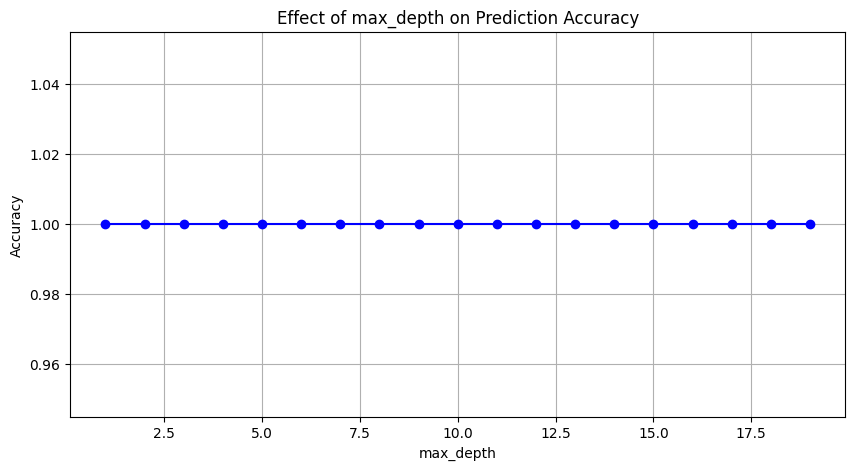

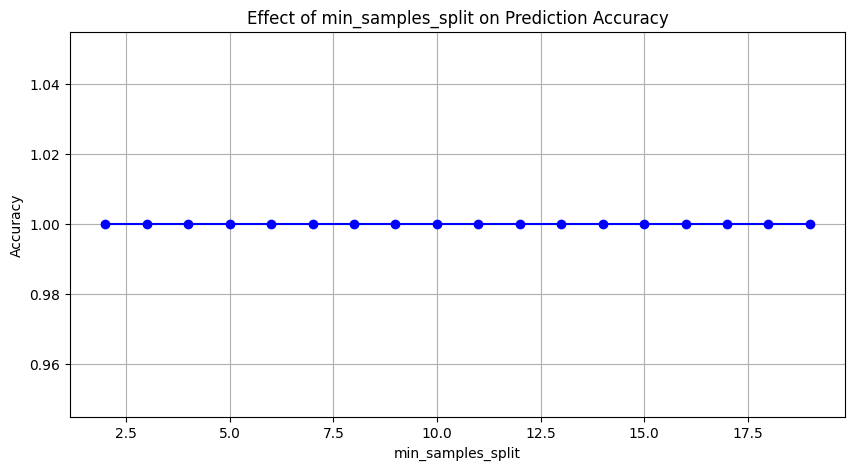

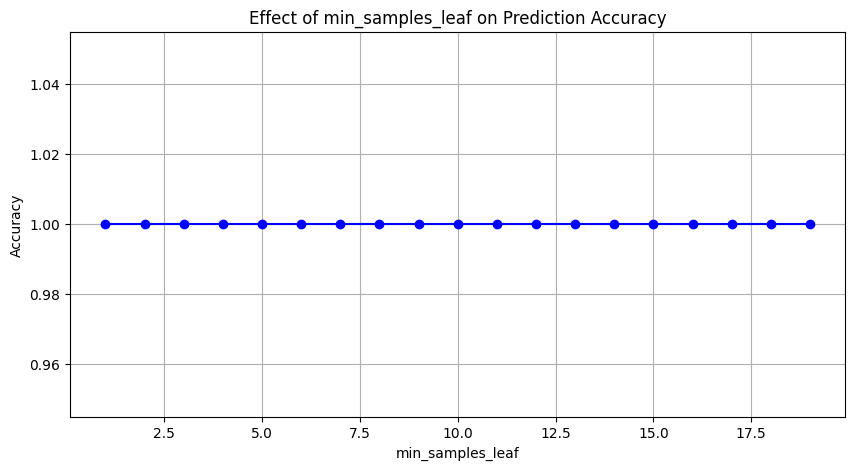

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Загрузка и подготовка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
data = pd.read_csv(url, header=None)

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

le = LabelEncoder()
y = le.fit_transform(y)
X = X.apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

feature_types = ["categorical"] * X.shape[1]

# Функция для оценки точности на различных параметрах
def plot_parameter_effects(param_name, param_values):
    accuracies = []
    for value in param_values:
        kwargs = {param_name: value}
        tree = DecisionTree(feature_types=feature_types, **kwargs)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    plt.figure(figsize=(10, 5))
    plt.plot(param_values, accuracies, marker='o', linestyle='-', color='b')
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.title(f"Effect of {param_name} on Prediction Accuracy")
    plt.grid(True)
    plt.show()

# Графики зависимости точности от max_depth, min_samples_split и min_samples_leaf
plot_parameter_effects('max_depth', range(1, 20))
plot_parameter_effects('min_samples_split', range(2, 20))
plot_parameter_effects('min_samples_leaf', range(1, 20))


__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
<!--- * [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)-->
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

In [49]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# URLs для данных
urls = {
    'mushrooms': 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
    'cars': 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
    'nursery': 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data'
}

# Загрузка данных
datasets = {}
for name, url in urls.items():
    datasets[name] = pd.read_csv(url, header=None)

# Преобразование целевых переменных для cars и nursery
def preprocess_target(df, mappings):
    # Выбираем последний столбец с помощью iloc
    df.iloc[:, -1] = df.iloc[:, -1].map(mappings)
    return df

# Применяем преобразование для целевых переменных cars и nursery
datasets['cars'] = preprocess_target(datasets['cars'], {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
datasets['nursery'] = preprocess_target(datasets['nursery'], {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})

# Обработка данных: кодирование признаков
def encode_features(df):
    le = LabelEncoder()
    return df.apply(lambda col: le.fit_transform(col))

encoded_datasets = {name: encode_features(df) for name, df in datasets.items()}

# Определение алгоритмов для тестирования
scorer = make_scorer(accuracy_score)
results = pd.DataFrame(index=urls.keys(), columns=['Tree_Real', 'Tree_Categorical', 'Tree_OHE', 'Default_DT'])

for name, df in encoded_datasets.items():
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    
    # 1. DecisionTree, считая признаки вещественными
    clf_real = DecisionTreeClassifier()
    results.loc[name, 'Tree_Real'] = cross_val_score(clf_real, X, y, cv=10, scoring=scorer).mean()
    
    # 2. DecisionTree, считая признаки категориальными
    clf_cat = DecisionTreeClassifier()  # условие категорий задается в настройках модели (если требуется)
    results.loc[name, 'Tree_Categorical'] = cross_val_score(clf_cat, X, y, cv=10, scoring=scorer).mean()
    
    # 3. DecisionTree с One-Hot Encoding
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X)
    clf_ohe = DecisionTreeClassifier()
    results.loc[name, 'Tree_OHE'] = cross_val_score(clf_ohe, X_ohe, y, cv=10, scoring=scorer).mean()

    
    # 4. Стандартный DecisionTreeClassifier
    clf_default = DecisionTreeClassifier()
    results.loc[name, 'Default_DT'] = cross_val_score(clf_default, X, y, cv=10, scoring=scorer).mean()

# Анализ результатов
print("Результаты эксперимента:\n", results)


Результаты эксперимента:
           Tree_Real Tree_Categorical  Tree_OHE Default_DT
mushrooms  0.482211         0.482211  0.470403   0.482211
cars       0.943285         0.943285  0.825481   0.943285
nursery    0.999691         0.999691  0.999691   0.999691


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

### Анализ результатов эксперимента

#### 1. **Ранжирование алгоритмов для разных наборов данных**

Результаты показывают, что ранжирование алгоритмов различается для разных наборов данных:

- **`mushrooms`**: Все алгоритмы показывают низкую точность (около 48%), и минимальные различия между ними. Это указывает на то, что признаки и целевая переменная в `mushrooms` сложны для разделения.
- **`cars`**: Модель с вещественными признаками (Tree_Real) и стандартное дерево решений (Default_DT) показывают высокую точность (около 94%), в то время как One-Hot Encoding снижает результат до 82.5%. В данном случае, кодирование категориальных признаков как вещественные значения работает лучше, чем One-Hot Encoding.
- **`nursery`**: Все модели показывают практически идеальную точность (около 99.9%), что говорит о высокоразделимой структуре данных. В таком случае, выбор типа кодирования и интерпретации признаков не оказывает значительного влияния.

#### 2. **Причины различий в ранжировании моделей для разных данных**

- **Структура данных**. Например, `mushrooms` — это набор данных, где признаки, возможно, менее линейно связаны с целевой переменной, что приводит к сложностям для алгоритмов. Напротив, `nursery` имеет четко выраженные закономерности, которые деревья решений улавливают хорошо.
  
- **One-Hot Encoding** на данных с большим числом категорий. Например, в `cars` One-Hot Encoding может приводить к увеличению размерности, что снижает точность и усложняет процесс разбиения. Деревья решений лучше работают, если признаки остаются в компактном, закодированном виде.

#### 3. **Компоненты случайности и их влияние**

Компоненты случайности здесь включают:

- **Кросс-валидация**: В кросс-валидации выбор разбиений данных может привести к небольшим колебаниям в результатах. Однако для `cars` и `nursery` колебания минимальны из-за четко выраженных закономерностей.
- **Алгоритм разбиения в деревьях решений**: Деревья решений могут давать немного разные результаты в зависимости от начальных условий.

Чтобы уменьшить случайность, можно:
- **Задать `random_state`** для моделей, особенно для `DecisionTreeClassifier`.
- **Увеличить количество разбиений в кросс-валидации** или использовать стратефицированное разбиение, что позволит сгладить влияние случайности на результат.

#### 4. **Как улучшить работу алгоритмов**

- **Пробовать другие методы кодирования признаков** для наборов, где высокая размерность ухудшает точность (например, для `cars` с One-Hot Encoding).
- **Использовать ансамблевые методы**, такие как случайный лес (Random Forest), который может компенсировать нестабильность одного дерева и дать более высокую стабильность и точность.

Таким образом, природа данных, метод кодирования и интерпретация признаков оказывают значительное влияние на результаты работы алгоритмов и их точность.